# Istotne pakiety używane w trakcie analizy i modelowania zbioru

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.decomposition
import sklearn.linear_model
import sklearn.preprocessing

from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.base import clone
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Przetwarzanie i wstępne sprawdzenie danych

In [2]:
# Wczytanie i wyświetlenie zbioru danych:
players = pd.read_excel('fifa.xlsx')
players

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2           9014  https://sofifa.com/player/9014/arjen-robben/15...   
3          41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4         167495  https://sofifa.com/player/167495/manuel-neuer/...   
...          ...                                                ...   
16150     220806  https://sofifa.com/player/220806/ellis-redman/...   
16151     225509  https://sofifa.com/player/225509/aaron-collins...   
16152     217591  https://sofifa.com/player/217591/piotr-zemlo/1...   
16153     222947  https://sofifa.com/player/222947/tom-davies/15...   
16154     201197  https://sofifa.com/player/201197/paul-tisdale/...   

              short_name                            long_name  age        dob  \
0               L. Messi       Lionel Andrés Messi Cuccittini   27 1987-06-24   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29 1985-02-05   
2              A. Robben                         Arjen Robben   30 1984-01-23   
3         Z. Ibrahimović                   Zlatan Ibrahimović   32 1981-10-03   
4               M. Neuer                         Manuel Neuer   28 1986-03-27   
...                  ...                                  ...  ...        ...   
16150          E. Redman                         Ellis Redman   17 1996-09-26   
16151         A. Collins                        Aaron Collins   17 1997-06-01   
16152           P. Żemło                          Piotr Żemło   18 1995-07-10   
16153          T. Davies                           Tom Davies   22 1992-04-18   
16154         P. Tisdale                         Paul Tisdale   41 1973-01-14   

       height_cm  weight_kg  nationality            club_name  ...   lwb  \
0            169         67    Argentina         FC Barcelona  ...  62+3   
1            185         80     Portugal          Real Madrid  ...  63+3   
2            180         80  Netherlands    FC Bayern München  ...  64+3   
3            195         95       Sweden  Paris Saint-Germain  ...  61+3   
4            193         92      Germany    FC Bayern München  ...  36+3   
...          ...        ...          ...                  ...  ...   ...   
16150        187         81        Wales       Newport County  ...  37+0   
16151        178         57        Wales       Newport County  ...  31+0   
16152        190         76       Poland         Wisła Kraków  ...  48+0   
16153        180         70      England       Fleetwood Town  ...  37+0   
16154        175         72        Malta          Exeter City  ...  36+0   

        ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0      62+3  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  
1      63+3  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  
2      64+3  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  
3      65+3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  
4      40+3  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
16150  38+0  38+0  38+0  37+0  40+0  41+0  41+0  41+0  40+0  
16151  30+0  30+0  30+0  31+0  32+0  31+0  31+0  31+0  32+0  
16152  46+0  46+0  46+0  48+0   51+   53+   53+   53+   51+  
16153  36+0  36+0  36+0  37+0  39+0  40+0  40+0  40+0  39+0  
16154  37+0  37+0  37+0  36+0  34+0  33+0  33+0  33+0  34+0  

[16155 rows x 106 columns]

In [3]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 106 entries, sofifa_id to rb
dtypes: datetime64[ns](2), float64(18), int64(44), object(42)
memory usage: 13.1+ MB


In [4]:
# Wyświetlenie kolumny 'short_name':
players['short_name']

0                 L. Messi
1        Cristiano Ronaldo
2                A. Robben
3           Z. Ibrahimović
4                 M. Neuer
               ...        
16150            E. Redman
16151           A. Collins
16152             P. Żemło
16153            T. Davies
16154           P. Tisdale
Name: short_name, Length: 16155, dtype: object

In [5]:
# Sprawdzenie nazw kolumn w zbiorze 'players':
players.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [6]:
# Wyświetlenie pierwszych 10 pierwszych obserwacji:
players.head(10)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   
5     176580  https://sofifa.com/player/176580/luis-suarez/1...   
6         41  https://sofifa.com/player/41/andres-iniesta-lu...   
7     183277  https://sofifa.com/player/183277/eden-hazard/1...   
8       7826  https://sofifa.com/player/7826/robin-van-persi...   
9     121944  https://sofifa.com/player/121944/bastian-schwe...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27 1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29 1985-02-05   
2          A. Robben                         Arjen Robben   30 1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32 1981-10-03   
4           M. Neuer                         Manuel Neuer   28 1986-03-27   
5          L. Suárez             Luis Alberto Suárez Díaz   27 1987-01-24   
6            Iniesta                 Andrés Iniesta Luján   30 1984-05-11   
7          E. Hazard                          Eden Hazard   23 1991-01-07   
8      R. van Persie                     Robin van Persie   30 1983-08-06   
9  B. Schweinsteiger               Bastian Schweinsteiger   29 1984-08-01   

   height_cm  weight_kg  nationality            club_name  ...   lwb   ldm  \
0        169         67    Argentina         FC Barcelona  ...  62+3  62+3   
1        185         80     Portugal          Real Madrid  ...  63+3  63+3   
2        180         80  Netherlands    FC Bayern München  ...  64+3  64+3   
3        195         95       Sweden  Paris Saint-Germain  ...  61+3  65+3   
4        193         92      Germany    FC Bayern München  ...  36+3  40+3   
5        181         81      Uruguay         FC Barcelona  ...  67+3  67+3   
6        170         65        Spain         FC Barcelona  ...  76+3  77+3   
7        173         74      Belgium              Chelsea  ...  62+2  64+2   
8        187         71  Netherlands    Manchester United  ...  60+3  63+3   
9        183         79      Germany    FC Bayern München  ...  81+2  84+2   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3  
1  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3  
2  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3  
3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  
4  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3  
5  67+3  67+3  67+3  62+3  57+3  57+3  57+3  62+3  
6  77+3  77+3  76+3  70+3  63+3  63+3  63+3  70+3  
7  64+2  64+2  62+2  54+2  46+2  46+2  46+2  54+2  
8  63+3  63+3  60+3  54+3  48+3  48+3  48+3  54+3  
9  84+2  84+2  81+2  81+2  79+2  79+2  79+2  81+2  

[10 rows x 106 columns]

In [7]:
# Wyświetlenie 10 ostatnich obserwacji:
players.tail(10)

sofifa_id                                         player_url  \
16145      11728  https://sofifa.com/player/11728/barry-richards...   
16146     211228  https://sofifa.com/player/211228/matthew-palme...   
16147     220939  https://sofifa.com/player/220939/luke-pilling/...   
16148     222997  https://sofifa.com/player/222997/marcus-maier/...   
16149     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
16150     220806  https://sofifa.com/player/220806/ellis-redman/...   
16151     225509  https://sofifa.com/player/225509/aaron-collins...   
16152     217591  https://sofifa.com/player/217591/piotr-zemlo/1...   
16153     222947  https://sofifa.com/player/222947/tom-davies/15...   
16154     201197  https://sofifa.com/player/201197/paul-tisdale/...   

          short_name         long_name  age        dob  height_cm  weight_kg  \
16145  B. Richardson  Barry Richardson   44 1969-08-05        185         77   
16146      M. Palmer    Matthew Palmer   18 1995-08-01        179         79   
16147     L. Pilling      Luke Pilling   16 1997-07-25        180         69   
16148       M. Maier      Marcus Maier   18 1995-12-18        174         70   
16149  S. Ramsbottom    Sam Ramsbottom   18 1996-04-03        196         80   
16150      E. Redman      Ellis Redman   17 1996-09-26        187         81   
16151     A. Collins     Aaron Collins   17 1997-06-01        178         57   
16152       P. Żemło       Piotr Żemło   18 1995-07-10        190         76   
16153      T. Davies        Tom Davies   22 1992-04-18        180         70   
16154     P. Tisdale      Paul Tisdale   41 1973-01-14        175         72   

      nationality                 club_name  ...   lwb   ldm   cdm   rdm  \
16145     England         Wycombe Wanderers  ...  27+0  28+0  28+0  28+0   
16146     England             Burton Albion  ...  48+0  49+0  49+0  49+0   
16147       Wales           Tranmere Rovers  ...  28+0  28+0  28+0  28+0   
16148     Austria  FC Admira Wacker Mödling  ...  39+0  43+0  43+0  43+0   
16149     England           Tranmere Rovers  ...  28+0  27+0  27+0  27+0   
16150       Wales            Newport County  ...  37+0  38+0  38+0  38+0   
16151       Wales            Newport County  ...  31+0  30+0  30+0  30+0   
16152      Poland              Wisła Kraków  ...  48+0  46+0  46+0  46+0   
16153     England            Fleetwood Town  ...  37+0  36+0  36+0  36+0   
16154       Malta               Exeter City  ...  36+0  37+0  37+0  37+0   

        rwb    lb   lcb    cb   rcb    rb  
16145  27+0  27+0  30+0  30+0  30+0  27+0  
16146  48+0  50+0  51+0  51+0  51+0  50+0  
16147  28+0  28+0  28+0  28+0  28+0  28+0  
16148  39+0  38+0  39+0  39+0  39+0  38+0  
16149  28+0  27+0  28+0  28+0  28+0  27+0  
16150  37+0  40+0  41+0  41+0  41+0  40+0  
16151  31+0  32+0  31+0  31+0  31+0  32+0  
16152  48+0   51+   53+   53+   53+   51+  
16153  37+0  39+0  40+0  40+0  40+0  39+0  
16154  36+0  34+0  33+0  33+0  33+0  34+0  

[10 rows x 106 columns]

In [8]:
# Sprawdzenie typu zbioru danych:
type(players)

pandas.core.frame.DataFrame

In [9]:
# Sprawdzenie rozmiaru zbioru danych:
players.shape 

(16155, 106)

In [10]:
# Wyświetlenie podstawowych statystyk dla zmiennych numerycznych:
players.describe()

sofifa_id           age     height_cm     weight_kg   league_rank  \
count   16155.000000  16155.000000  16155.000000  16155.000000  15916.000000   
mean   189284.184525     24.776230    181.083627     75.474342      1.378424   
std     39749.261554      4.625321      6.618974      6.891796      0.736796   
min         2.000000     16.000000    155.000000     50.000000      1.000000   
25%    178042.500000     21.000000    176.000000     70.000000      1.000000   
50%    200841.000000     24.000000    181.000000     75.000000      1.000000   
75%    214346.000000     28.000000    186.000000     80.000000      2.000000   
max    225562.000000     44.000000    204.000000    110.000000      4.000000   

            overall     potential     value_eur       wage_eur  \
count  16155.000000  16155.000000  1.615500e+04   16155.000000   
mean      63.830393     68.350108  1.060882e+06   13056.453110   
std        7.169896      6.580610  2.819128e+06   23488.182571   
min       40.000000     40.000000  0.000000e+00       0.000000   
25%       59.000000     64.000000  1.200000e+05    2000.000000   
50%       64.000000     68.000000  3.500000e+05    5000.000000   
75%       68.000000     73.000000  8.250000e+05   10000.000000   
max       93.000000     95.000000  1.005000e+08  550000.000000   

       international_reputation  ...  mentality_penalties  \
count              16155.000000  ...         16155.000000   
mean                   1.122501  ...            49.648344   
std                    0.396263  ...            14.552244   
min                    1.000000  ...            20.000000   
25%                    1.000000  ...            39.000000   
50%                    1.000000  ...            50.000000   
75%                    1.000000  ...            61.000000   
max                    5.000000  ...            95.000000   

       mentality_composure  defending_marking  defending_standing_tackle  \
count                  0.0       16155.000000               16155.000000   
mean                   NaN          45.009037                  47.656639   
std                    NaN          17.915206                  18.743105   
min                    NaN          20.000000                  20.000000   
25%                    NaN          25.000000                  25.000000   
50%                    NaN          46.000000                  52.000000   
75%                    NaN          61.000000                  64.000000   
max                    NaN          90.000000                  91.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              16155.000000        16155.000000          16155.000000   
mean                  45.885918           15.869514             15.511668   
std                   18.145497           17.576799             16.414173   
min                   20.000000            1.000000              1.000000   
25%                   25.000000            8.000000              8.000000   
50%                   49.000000           11.000000             11.000000   
75%                   62.000000           13.000000             14.000000   
max                   95.000000           88.000000             87.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
count         16155.000000             16155.000000          16155.000000  
mean             15.354875                15.504735             15.998514  
std              16.010498                16.585081             17.983209  
min               1.000000                 1.000000              1.000000  
25%               8.000000                 8.000000              8.000000  
50%              11.000000                10.000000             10.000000  
75%              13.000000                13.000000             13.000000  
max              92.000000                90.000000             90.000000  

[8 rows x 62 columns]

In [11]:
# Wyświetlenie podstawowych statystyk dla wszystkich zmiennych, także dla zmiennych kategorycznych:
players.describe(include='all') 

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


sofifa_id                                         player_url  \
count    16155.000000                                              16155   
unique            NaN                                              16155   
top               NaN  https://sofifa.com/player/192466/michael-marro...   
freq              NaN                                                  1   
first             NaN                                                NaN   
last              NaN                                                NaN   
mean    189284.184525                                                NaN   
std      39749.261554                                                NaN   
min          2.000000                                                NaN   
25%     178042.500000                                                NaN   
50%     200841.000000                                                NaN   
75%     214346.000000                                                NaN   
max     225562.000000                                                NaN   

          short_name    long_name           age                  dob  \
count          16155        16155  16155.000000                16155   
unique         15195        16104           NaN                 5902   
top     J. Rodríguez  Tommy Smith           NaN  1988-01-01 00:00:00   
freq               7            3           NaN                   18   
first            NaN          NaN           NaN  1969-07-19 00:00:00   
last             NaN          NaN           NaN  1998-01-25 00:00:00   
mean             NaN          NaN     24.776230                  NaN   
std              NaN          NaN      4.625321                  NaN   
min              NaN          NaN     16.000000                  NaN   
25%              NaN          NaN     21.000000                  NaN   
50%              NaN          NaN     24.000000                  NaN   
75%              NaN          NaN     28.000000                  NaN   
max              NaN          NaN     44.000000                  NaN   

           height_cm     weight_kg nationality club_name  ...    lwb    ldm  \
count   16155.000000  16155.000000       16155     15916  ...  16155  16155   
unique           NaN           NaN         149       577  ...    155    155   
top              NaN           NaN     England     Genoa  ...   55+0   59+0   
freq             NaN           NaN        1627        33  ...    600    576   
first            NaN           NaN         NaN       NaN  ...    NaN    NaN   
last             NaN           NaN         NaN       NaN  ...    NaN    NaN   
mean      181.083627     75.474342         NaN       NaN  ...    NaN    NaN   
std         6.618974      6.891796         NaN       NaN  ...    NaN    NaN   
min       155.000000     50.000000         NaN       NaN  ...    NaN    NaN   
25%       176.000000     70.000000         NaN       NaN  ...    NaN    NaN   
50%       181.000000     75.000000         NaN       NaN  ...    NaN    NaN   
75%       186.000000     80.000000         NaN       NaN  ...    NaN    NaN   
max       204.000000    110.000000         NaN       NaN  ...    NaN    NaN   

          cdm    rdm    rwb     lb    lcb     cb    rcb     rb  
count   16155  16155  16155  16155  16155  16155  16155  16155  
unique    155    155    155    159    174    174    174    159  
top      59+0   59+0   55+0   61+0   64+0   64+0   64+0   61+0  
freq      576    576    600    551    480    480    480    551  
first     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
last      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
75%       NaN    NaN    NaN    NaN    NaN    NaN   

In [12]:
# Przykładowe użycie funkcji iloc dla podzbioru 'numeryczne':
players.iloc[:,3:-1] 
# Uwaga: bierzemy wszystkie wiersze, natomiast kolumny począwszy od 4. do przedostaniej.

long_name  age        dob  height_cm  \
0           Lionel Andrés Messi Cuccittini   27 1987-06-24        169   
1      Cristiano Ronaldo dos Santos Aveiro   29 1985-02-05        185   
2                             Arjen Robben   30 1984-01-23        180   
3                       Zlatan Ibrahimović   32 1981-10-03        195   
4                             Manuel Neuer   28 1986-03-27        193   
...                                    ...  ...        ...        ...   
16150                         Ellis Redman   17 1996-09-26        187   
16151                        Aaron Collins   17 1997-06-01        178   
16152                          Piotr Żemło   18 1995-07-10        190   
16153                           Tom Davies   22 1992-04-18        180   
16154                         Paul Tisdale   41 1973-01-14        175   

       weight_kg  nationality            club_name  \
0             67    Argentina         FC Barcelona   
1             80     Portugal          Real Madrid   
2             80  Netherlands    FC Bayern München   
3             95       Sweden  Paris Saint-Germain   
4             92      Germany    FC Bayern München   
...          ...          ...                  ...   
16150         81        Wales       Newport County   
16151         57        Wales       Newport County   
16152         76       Poland         Wisła Kraków   
16153         70      England       Fleetwood Town   
16154         72        Malta          Exeter City   

                       league_name  league_rank  overall  ...    rm   lwb  \
0           Spain Primera Division          1.0       93  ...  90+3  62+3   
1           Spain Primera Division          1.0       92  ...  87+3  63+3   
2             German 1. Bundesliga          1.0       90  ...  87+3  64+3   
3                   French Ligue 1          1.0       90  ...  83+3  61+3   
4             German 1. Bundesliga          1.0       90  ...  38+3  36+3   
...                            ...          ...      ...  ...   ...   ...   
16150           English League Two          4.0       41  ...  34+0  37+0   
16151           English League Two          4.0       41  ...  35+0  31+0   
16152  Polish T-Mobile Ekstraklasa          1.0       40  ...  40+0  48+0   
16153           English League One          3.0       40  ...  34+0  37+0   
16154           English League Two          4.0       40  ...   41+  36+0   

        ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  
0      62+3  62+3  62+3  62+3  54+3  45+3  45+3  45+3  
1      63+3  63+3  63+3  63+3  57+3  52+3  52+3  52+3  
2      64+3  64+3  64+3  64+3  55+3  46+3  46+3  46+3  
3      65+3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  
4      40+3  40+3  40+3  36+3  36+3  38+3  38+3  38+3  
...     ...   ...   ...   ...   ...   ...   ...   ...  
16150  38+0  38+0  38+0  37+0  40+0  41+0  41+0  41+0  
16151  30+0  30+0  30+0  31+0  32+0  31+0  31+0  31+0  
16152  46+0  46+0  46+0  48+0   51+   53+   53+   53+  
16153  36+0  36+0  36+0  37+0  39+0  40+0  40+0  40+0  
16154  37+0  37+0  37+0  36+0  34+0  33+0  33+0  33+0  

[16155 rows x 102 columns]

In [13]:
# Stworzenie ramki danych z krótką i długą nazwą piłkarzy:
players_names = players.loc[:, 'short_name':'long_name'] 
# Uwaga: argumenty nawiasu kwadratowego: ':' oznacza uwzględnienie wszystkich obserwaji, natomiast po ',' jest zakres kolumn.
players_names.head()

short_name                            long_name
0           L. Messi       Lionel Andrés Messi Cuccittini
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro
2          A. Robben                         Arjen Robben
3     Z. Ibrahimović                   Zlatan Ibrahimović
4           M. Neuer                         Manuel Neuer

In [14]:
# Tworzymy ramkę danych na podstawie zbioru 'players' do zmiennej 'club_name' włącznie.
# Następnie wyświetlamy 5 pierwszych wierszy z zakresu 100:200.
players_clubs = players.loc[100:200, :'club_name'] 
players_clubs.head()

sofifa_id                                         player_url  \
100     189362  https://sofifa.com/player/189362/givanildo-vie...   
101     190460  https://sofifa.com/player/190460/christian-eri...   
102     192448  https://sofifa.com/player/192448/marc-andre-te...   
103     194765  https://sofifa.com/player/194765/antoine-griez...   
104     169416  https://sofifa.com/player/169416/carlos-vela/1...   

        short_name                    long_name  age        dob  height_cm  \
100           Hulk    Givanildo Vieira de Souza   27 1986-07-25        180   
101     C. Eriksen  Christian Dannemann Eriksen   22 1992-02-14        177   
102  M. ter Stegen        Marc-André ter Stegen   22 1992-04-30        189   
103   A. Griezmann            Antoine Griezmann   23 1991-03-21        176   
104        C. Vela  Carlos Alberto Vela Garrido   25 1989-03-01        177   

     weight_kg nationality             club_name  
100         85      Brazil  Zenit St. Petersburg  
101         71     Denmark     Tottenham Hotspur  
102         82     Germany          FC Barcelona  
103         68      France       Atlético Madrid  
104         75      Mexico         Real Sociedad

# Czyszczenie zbioru danych

In [15]:
# Policzmy, ile braków wartości ma każda z kolumn:
players.isna().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [16]:
nullsum = 0
nulldf = players.isna()
for i in range(16155):
    for j in range(62):
        if nulldf.iloc[i,j] == True:
            nullsum = nullsum + 1
            break
print(nullsum)

16155


In [17]:
# Pokazanie, że dla zmiennej 'release_clause_eur' występuje aż 16155 braków danych:
players['release_clause_eur'].isnull().sum()

16155

In [18]:
# Najpierw usuwamy 'release_clause_eur' oraz 'mentality_composure', ponieważ wszystkie ich wartości są puste. Potem usuwamy 
# 'nation_jersey_number', ponieważ ma tylko 1081 z 16155 niepustych wartości. Następnie usuwamy sofifa_id, ponieważ są to 
# indeksy pilkarzy ze strony z której zostały pozyskane dane. Ponadto zmienne: 'player_url', 'long_name', 'dob', 'joined', 
# 'real_face',' 'body_type' nie są istotne w dalszych rozważaniach, więc je usuńmy.
players = players.drop(['player_url', 'short_name','long_name', 'dob', 'joined', 'real_face', 'body_type','sofifa_id','release_clause_eur', 'mentality_composure', 'nation_jersey_number'], axis = 1)

In [19]:
numeryczne = players.select_dtypes([np.number]).columns
nienumeryczne = players.select_dtypes(exclude=[np.number]).columns

In [20]:
# Widzimy, że zmienne z indeksami od 15 do 26 to umiejętnosci pilkarzy. Braki danych występują, gdyż zawodnicy z pola nie mają 
# statystyk od 22 do 27, z kolei bramkarze nie mają statystyk od 16 do 21. Ponieważ są to umiejętności piłkarzy, to możemy 
# założyć, że zawodnicy z pustymi wartościami od 13 do 24 nie mają rozwiniętych tych umiejętnosci, czyli ich wartość wynosi 0.
players = players.fillna(value=dict((key, 0) for key in players.columns[23:35])) 
# Uwaga: po usunięciu wcześniej 4 kolumn, numery kolumn się przesuwają, stąd mamy 13:25. Oczywiście, działamy włącznie do 
# kolumny o numerze 24. Pamiętajmy jednak, że Python jest prawostronnie otwarty.

In [21]:
# Ponieważ, 'league_rank', czyli ranking ligi istotnie wpływa na wiele kluczowych zmiennych takich jak ocena ogólna zawodników, 
# czy ich wypłata, to piłkarze, którzy nie mają wartości 'league_rank', nie mają też wartości 'club_name', 'league_name', czy 
# też 'team_jersey_number', a więc możemy przypuszczać, że są to tzw. "wolni zawodnicy". Z tego faktu nie możemy interpolować do 
# jakiej ligi oni trafi, czyli musimy usunąć te obserwacje.
for i in players[numeryczne].drop(['team_jersey_number', 'contract_valid_until', 'league_rank'],axis = 1):
    wynik = stats.pearsonr(players[players['league_rank'].notnull()]['league_rank'], players[i][0:15916])
    if wynik[1] < 0.05:
        print("Nazwa : {} | wsp. korelacji {} | p-value {}".format(i,wynik[0],wynik[1]))
players = players.dropna(subset=['league_rank'], axis = 0)
# Czyli w skrócie: usuwamy "wolnych piłkarzy", gdyż usuwamy te obserwacje, dla których zmienna 'league_rank' ma wartości null.

Nazwa : age | wsp. korelacji -0.1130554373254701 | p-value 1.959153388725634e-46
Nazwa : weight_kg | wsp. korelacji -0.021228994000560122 | p-value 0.0073994200591498294
Nazwa : overall | wsp. korelacji -0.24631665795078664 | p-value 1.307718300728325e-218
Nazwa : potential | wsp. korelacji -0.19774280124552368 | p-value 4.641862314865875e-140
Nazwa : value_eur | wsp. korelacji -0.13235301350175468 | p-value 4.046180559815458e-63
Nazwa : wage_eur | wsp. korelacji -0.1769923358591026 | p-value 3.68749690107261e-112
Nazwa : international_reputation | wsp. korelacji -0.1213977947345564 | p-value 2.5596790682291295e-53
Nazwa : weak_foot | wsp. korelacji -0.061288047218515045 | p-value 1.0045118286979313e-14
Nazwa : skill_moves | wsp. korelacji -0.06406593996794377 | p-value 5.959235964480755e-16
Nazwa : pace | wsp. korelacji -0.03255289301802581 | p-value 3.9980142303239335e-05
Nazwa : shooting | wsp. korelacji -0.07892292392406199 | p-value 2.029693996133992e-23
Nazwa : passing | wsp. kor

In [22]:
# W zmiennych: 'player_tags', 'loaned_from', 'nation_position' oraz 'player_traits' za brakujące wartosci dajmy wartości None:
players = players.fillna('None')

# Analiza zbioru danych

## Sprawdzenie, czy zbiór danych nadaje się do modelowania 

In [23]:
# Sprawdźmy rozkład wartości zmiennej 'overall':
players.overall.value_counts()

64    1027
63     950
65     902
60     867
62     863
66     824
67     800
61     781
68     752
58     654
59     651
69     569
57     548
70     528
56     484
71     446
72     437
55     371
73     368
74     366
54     361
53     270
52     262
75     260
76     210
51     206
50     174
77     147
49     128
78     124
79     111
80      80
47      65
48      63
81      56
82      50
83      37
46      26
84      19
45      17
85      13
86      13
87       7
44       5
88       5
42       4
43       3
90       3
40       3
89       2
41       2
93       1
92       1
Name: overall, dtype: int64

In [24]:
# Sprawdźmy, jaki odsetek graczy w wieku powyżej 30 lat ma 'overall' na poziomie minimum 85. W tym celu podzielmy ilość 
# obserwacji w zbiorze data_1 przez ilość obserwacji w zbiorze data_2.
data_1 = players[(players['age'] > 30)]
data_1

age  height_cm  weight_kg     nationality            club_name  \
3       32        195         95          Sweden  Paris Saint-Germain   
10      31        170         72          France    FC Bayern München   
28      34        170         68           Spain         FC Barcelona   
29      31        189         90     Ivory Coast      Manchester City   
43      32        196         90  Czech Republic              Chelsea   
...    ...        ...        ...             ...                  ...   
15835   37        187         87          Norway        FK Bodø/Glimt   
15964   44        183         72        Scotland           St. Mirren   
15965   42        185         85         England        AFC Wimbledon   
16145   44        185         77         England    Wycombe Wanderers   
16154   41        175         72           Malta          Exeter City   

                  league_name  league_rank  overall  potential  value_eur  \
3              French Ligue 1          1.0       90         90   52500000   
10       German 1. Bundesliga          1.0       88         88   33000000   
28     Spain Primera Division          1.0       86         86   15500000   
29     English Premier League          1.0       86         86   28500000   
43     English Premier League          1.0       85         85   18000000   
...                       ...          ...      ...        ...        ...   
15835   Norwegian Eliteserien          1.0       50         50      10000   
15964    Scottish Premiership          1.0       49         49       6000   
15965      English League Two          4.0       49         49       6000   
16145      English League Two          4.0       43         43       6000   
16154      English League Two          4.0       40         40          0   

       ...   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
3      ...  61+3  65+3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  
10     ...  63+2  63+2  63+2  63+2  63+2  53+2  44+2  44+2  44+2  53+2  
28     ...  75+2  77+2  77+2  77+2  75+2  69+2  63+2  63+2  63+2  69+2  
29     ...  81+2  84+2  84+2  84+2  81+2  81+2  82+2  82+2  82+2  81+2  
43     ...  34+2  36+2  36+2  36+2  34+2  33+2  33+2  33+2  33+2  33+2  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
15835  ...  29+0  32+0  32+0  32+0  29+0  29+0  33+0  33+0  33+0  29+0  
15964  ...  26+0  27+0  27+0  27+0  26+0  26+0  29+0  29+0  29+0  26+0  
15965  ...  27+0  29+0  29+0  29+0  27+0  27+0  29+0  29+0  29+0  27+0  
16145  ...  27+0  28+0  28+0  28+0  27+0  27+0  30+0  30+0  30+0  27+0  
16154  ...  36+0  37+0  37+0  37+0  36+0  34+0  33+0  33+0  33+0  34+0  

[2012 rows x 95 columns]

In [25]:
data_2 = players[(players['age'] > 30) & (players['overall'] > 85)]
data_2

age  height_cm  weight_kg  nationality            club_name  \
3    32        195         95       Sweden  Paris Saint-Germain   
10   31        170         72       France    FC Bayern München   
28   34        170         68        Spain         FC Barcelona   
29   31        189         90  Ivory Coast      Manchester City   

               league_name  league_rank  overall  potential  value_eur  ...  \
3           French Ligue 1          1.0       90         90   52500000  ...   
10    German 1. Bundesliga          1.0       88         88   33000000  ...   
28  Spain Primera Division          1.0       86         86   15500000  ...   
29  English Premier League          1.0       86         86   28500000  ...   

     lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
3   61+3  65+3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3  
10  63+2  63+2  63+2  63+2  63+2  53+2  44+2  44+2  44+2  53+2  
28  75+2  77+2  77+2  77+2  75+2  69+2  63+2  63+2  63+2  69+2  
29  81+2  84+2  84+2  84+2  81+2  81+2  82+2  82+2  82+2  81+2  

[4 rows x 95 columns]

In [26]:
4*100/2012

0.1988071570576541

Wniosek: odsetek procentowy to około 0.199%

In [27]:
# Wyświetlamy zawodników, którzy mają: >= 190cm lub >= 90kg, a ich reprezentacja to Czechy lub Francja:
(players[((players['nationality'] == 'France') | (players['nationality'] == 'Czech Republic')) & ((players['height_cm'] >= 180) | (players['weight_kg'] >= 90))])[['height_cm', 'weight_kg', 'nationality']]

height_cm  weight_kg     nationality
35           184         79          France
39           188         78          France
43           196         90  Czech Republic
64           188         80          France
75           188         90          France
...          ...        ...             ...
15665        180         75          France
15700        180         64          France
15709        186         72          France
15804        182         79  Czech Republic
15876        190         84          France

[644 rows x 3 columns]

In [28]:
# Sprawdzimy korelację Pearsona:
corr_P = players[numeryczne].corr("pearson")
corr_P

age  height_cm  weight_kg  league_rank  \
age                         1.000000   0.086386   0.212925    -0.045947   
height_cm                   0.086386   1.000000   0.766543     0.037870   
weight_kg                   0.212925   0.766543   1.000000     0.009887   
league_rank                -0.045947   0.037870   0.009887     1.000000   
overall                     0.436476   0.050853   0.123958    -0.246777   
potential                  -0.073700   0.014169   0.014859    -0.231447   
value_eur                   0.128553   0.018413   0.043988    -0.132561   
wage_eur                    0.203047   0.028629   0.062256    -0.191666   
international_reputation    0.275633   0.049032   0.083041    -0.119929   
weak_foot                   0.084129  -0.169656  -0.129316    -0.038801   
skill_moves                 0.000010  -0.413681  -0.357846    -0.061517   
team_jersey_number         -0.241068  -0.053170  -0.091834    -0.105496   
contract_valid_until       -0.117197  -0.112735  -0.081279    -0.233509   
pace                       -0.145774  -0.472250  -0.437818    -0.004180   
shooting                    0.060474  -0.372374  -0.312870    -0.068628   
passing                     0.080754  -0.420553  -0.371242    -0.080095   
dribbling                  -0.008580  -0.481874  -0.427456    -0.071679   
defending                   0.107772  -0.106289  -0.103224    -0.051772   
physic                      0.091401  -0.141981  -0.098950    -0.012762   
gk_diving                   0.090415   0.353732   0.339266    -0.016196   
gk_handling                 0.098535   0.354013   0.341120    -0.018119   
gk_kicking                  0.092619   0.352737   0.340196    -0.019364   
gk_reflexes                 0.089880   0.353390   0.339453    -0.016541   
gk_speed                    0.063782   0.340170   0.319975    -0.008200   
gk_positioning              0.103826   0.354346   0.342136    -0.019599   
attacking_crossing          0.157447  -0.433087  -0.360992    -0.105037   
attacking_finishing         0.067551  -0.292978  -0.236001    -0.068320   
attacking_heading_accuracy  0.174508   0.095794   0.092024    -0.084114   
attacking_short_passing     0.124812  -0.344752  -0.297688    -0.127225   
attacking_volleys           0.143657  -0.287008  -0.221798    -0.105188   
skill_dribbling             0.011417  -0.481125  -0.414177    -0.113873   
skill_curve                 0.154813  -0.384073  -0.314538    -0.119394   
skill_fk_accuracy           0.217475  -0.325469  -0.251618    -0.088228   
skill_long_passing          0.171177  -0.307880  -0.263720    -0.125346   
skill_ball_control          0.086066  -0.397048  -0.338323    -0.122261   
movement_acceleration      -0.198376  -0.521482  -0.474940    -0.014757   
movement_sprint_speed      -0.183094  -0.438491  -0.404827    -0.017010   
movement_agility           -0.039617  -0.606185  -0.534465    -0.025355   
movement_reactions          0.398397  -0.005797   0.057982    -0.205751   
movement_balance           -0.116250  -0.816481  -0.706912    -0.012853   
power_shot_power            0.168958  -0.246073  -0.167221    -0.119192   
power_jumping               0.138199  -0.093796  -0.041693    -0.021178   
power_stamina               0.064838  -0.266612  -0.225170    -0.006196   
power_strength              0.322528   0.551733   0.619053    -0.023176   
power_long_shots            0.160953  -0.320630  -0.245074    -0.113142   
mentality_aggression        0.278146  -0.016378   0.033475    -0.080881   
mentality_interceptions     0.200364  -0.008890  -0.005059    -0.076542   
mentality_positioning       0.080966  -0.385988  -0.317739    -0.089393   
mentality_vision            0.143664  -0.394035  -0.335631    -0.091345   
mentality_penalties         0.133785  -0.291861  -0.227127    -0.075520   
defending_marking           0.157367   0.038379   0.031813    -0.065619   
defending_standing_tackle   0.145419   0.019549   0.013669    -0.057351   
defending_sliding_tackle    0.121392   0.004161  -0.003910

In [29]:
# Tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od |0.9|:
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.9]

physic                 gk_diving                  -0.902933
                       gk_reflexes                -0.902178
                       gk_handling                -0.900533
movement_acceleration  movement_sprint_speed       0.900014
defending              defending_sliding_tackle    0.900858
                                                     ...   
gk_handling            gk_reflexes                 0.995290
gk_reflexes            gk_positioning              0.995299
gk_diving              gk_handling                 0.995608
gk_handling            gk_positioning              0.996576
gk_diving              gk_reflexes                 0.997829
Length: 77, dtype: float64

Wniosek: widzimy, że jest wiele bardzo wysokich korelacji dla zmiennych numerycznych, a stąd możemy wywnioskować, że zbiór 
'players' i jego podzbiory bądź też kolejne modyfikacje powinny się bardzo dobrze nadawać do zamodelowania.

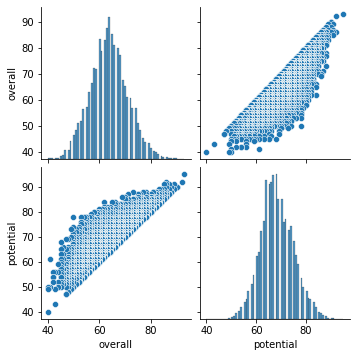

In [30]:
# Wizualizacja korelacji 2 wybranych zmiennych numerycznych przy pomocy seaborn pairplot:
sns.pairplot(players[numeryczne].loc[:, 'overall':'potential'])

## Wizualizacja danych 

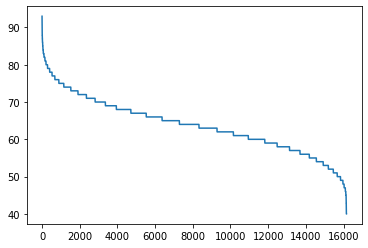

In [31]:
# Wykres zmiennej 'overall' dla podzbioru 'numeryczne':
players["overall"].plot()
plt.show()
# Uwaga: na osi y będzie wartość 'overall', z kolei na osi x będą kolejne indeksy tego podzbioru. A że indeksy rosną przeciwnie
# do wartości zmiennej 'overall', to funckja jest malejąca.

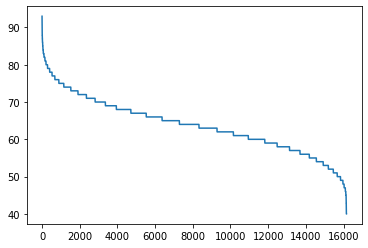

In [32]:
# Alternatywny sposób przedstawienia wartości zmiennej 'overall':
plt.plot(players["overall"].index, players["overall"])
plt.show()

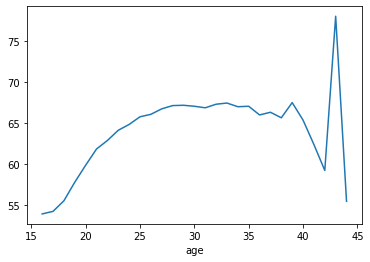

In [33]:
# Wykres średniej wartości 'overall' zawodników w zależności od wieku:
players["overall"].groupby(players["age"]).agg(np.mean).plot()
plt.show()
# Uwaga: braliśmy zmienną 'overall', na jej rzecz wykonujemy f-cję grupowania względem wieku, a potem musimy je zagregować.

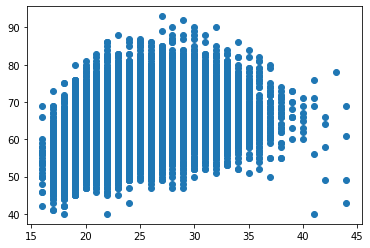

In [34]:
# Wykres punktowy ukazujący zależność między wiekiem piłkarza, a jego 'overall':
plt.scatter(players.age, players.overall)
plt.show()

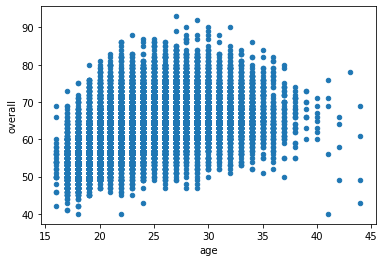

In [35]:
# Alternatywny sposób przedstawienia tej zależności:
players.plot(x="age", y="overall", kind="scatter")
plt.show()

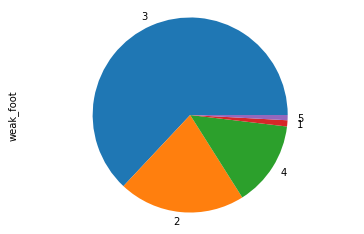

In [36]:
# Wizulizujemy ilość każdej wartości zmiennej 'weak_foot' tworząc wykres kołowy: 
players.weak_foot.value_counts().plot(kind="pie")
plt.axis("equal")
plt.show()

In [37]:
# Ten podział pokazany został właśnie na wykresie:
players.weak_foot.value_counts()

3    10028
2     3337
4     2251
1      163
5      137
Name: weak_foot, dtype: int64

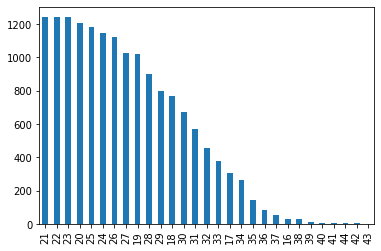

In [38]:
# Histogram wieku piłkarzy:
players.age.value_counts().plot(kind="bar") 
plt.show()

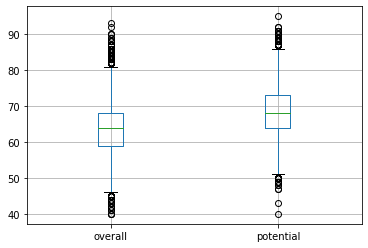

In [39]:
# Wywołujemy wykres boxplot na rzecz ramki danych złożonej ze zmiennych 'overall' i 'potential'. Na wykresie widzimy: wartość 
# średnią, rozstęp kwartylowy i wartości odstające.
# Uwaga: wartości odstające to zwykle są jako wartości mean +- 3*std.
overall_potential = players.loc[:, ['overall', 'potential']]
overall_potential
boxplots = overall_potential.boxplot(return_type='axes')

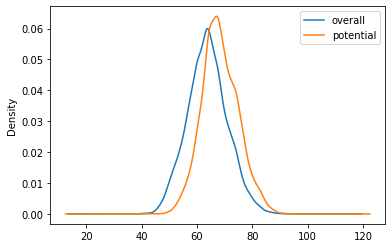

In [40]:
# Generujemy rozkład dla zmiennych 'overall' i 'potential': 
densityplot = overall_potential.plot(kind='density')

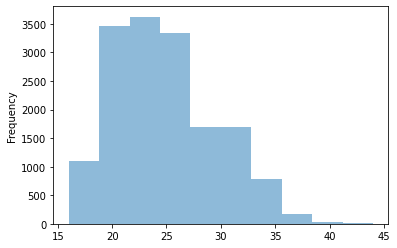

In [41]:
# Histogram wieku piłkarzy:
single_distribution = players['age'].plot(kind='hist', alpha=0.5)

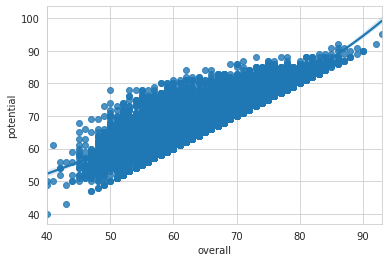

In [42]:
# Zależności między zmiennymi liczbowymi: 'overall' i 'potential' wraz z linią regresji:
with sns.axes_style("whitegrid"):
    sns.regplot(data=overall_potential, x='overall', y="potential", order=3) 
# Uwaga: regresja za pomocą wielomianu 3. stopnia, bo order=3.

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


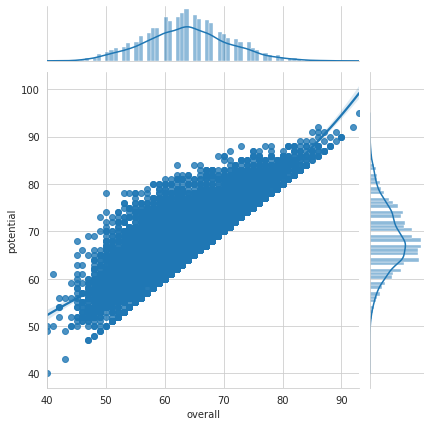

In [43]:
# Zależności między zmiennymi liczbowymi: 'overall' i 'potential' wraz z linią regresji 3. stopnia i rozkładami:
with sns.axes_style("whitegrid"):
    sns.jointplot("overall", "potential", data=overall_potential, kind='reg',order=3)

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'order'
  **contour_kws,


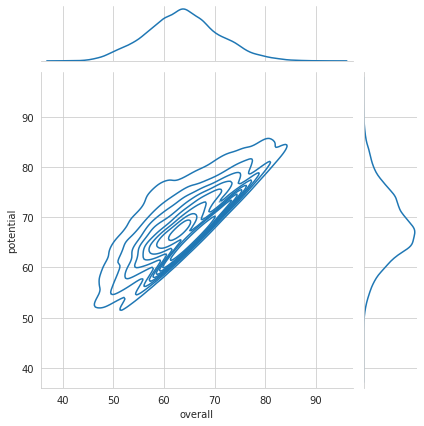

In [44]:
# Zależności między zmiennymi liczbowymi: 'overall' i 'potential' wraz z jądrowymi gęstościami:
with sns.axes_style("whitegrid"):
    sns.jointplot("overall", "potential", data=overall_potential, kind='kde',order=3)

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


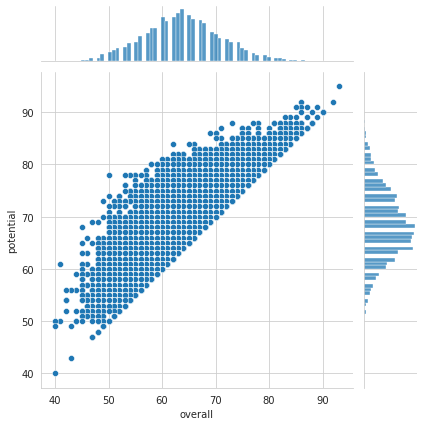

In [45]:
# Zależności między zmiennymi liczbowymi: 'overall' i 'potential' i wykresami punktowymi:
with sns.axes_style("whitegrid"):
    sns.jointplot("overall", "potential", data=overall_potential, kind='scatter')

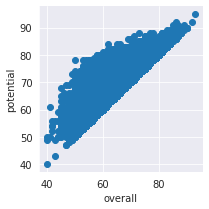

In [46]:
# Wykres panelowy między zmienną 'overall' i 'potential':
with sns.axes_style("darkgrid"):
    chart = sns.FacetGrid(overall_potential)  
    chart.map(plt.scatter, "overall", "potential")

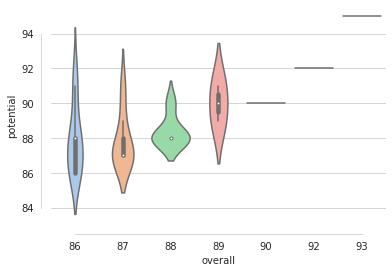

In [47]:
# Wykresy skrzypcowe dla graczy o zmiennej 'overall' > 85: 
skrzypcowy = players[(players['overall'] > 85)]
with sns.axes_style("whitegrid"):    
    ax = sns.violinplot(x="overall", y="potential",
                        data=skrzypcowy, palette="pastel")
    sns.despine(offset=10, trim=True)
# Uwaga: są tu zaznaczone min i max oraz rozrzut, czyli odchylenie std.

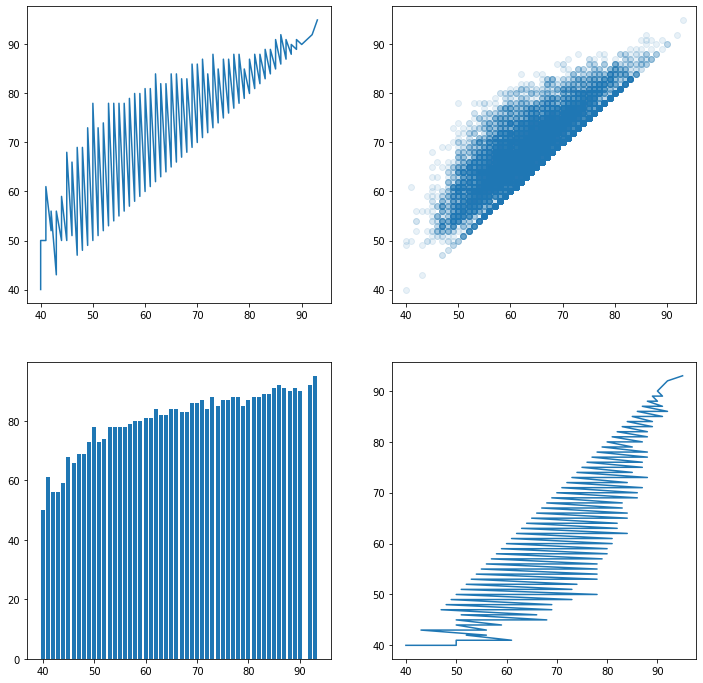

In [48]:
# Cztery wykresy wykonane w jednym miejscu:
x = players['overall']
y = players['potential']
fig, axs = plt.subplots(2, 2, figsize=(12, 12)) #2 wykresy po 2 kolumny, rozmiar (12,12)
axs[0, 0].plot(x,y)
axs[1, 0].bar(x,y)
axs[0, 1].scatter(x, y, marker='o', alpha=.1)
axs[1, 1].plot(y,x)
plt.show()

## Rozkłady brzegowe 

In [49]:
# Uwaga: poniższe dopasowania są bardzo umowne, gdyż zmienne, do których dopasowane będą rozkłady, są de facto dyskretne, a nie 
# ciągłe. Te przykłady służą tylko zaprezentowaniu jak zwizualizować gęstość dopasowanego rozkładu.

In [50]:
# Najpierw dla atrybutu 'strength': 

(array([  48.,  380.,  601., 1121., 2312., 3698., 4071., 2371., 1015.,
         299.]),
 array([21. , 28.6, 36.2, 43.8, 51.4, 59. , 66.6, 74.2, 81.8, 89.4, 97. ]),
 <BarContainer object of 10 artists>)

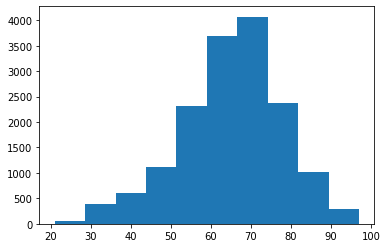

In [51]:
plt.hist(players['power_strength'])

In [52]:
skew(players['power_strength'])

-0.45130143823264113

In [53]:
kurtosis(players['power_strength'])

0.09790256139273534

In [54]:
# Spróbujemy teraz dopasować rozkłady beta, normalny i gamma:

In [55]:
a,b,c,d = stats.distributions.beta.fit(players['power_strength'])
mean,var = stats.distributions.norm.fit(players['power_strength'])
alfa,beta,pi = stats.distributions.gamma.fit(players['power_strength'])

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [56]:
x = np.linspace(0,100,500)
fitted_beta = stats.distributions.beta.pdf(x,a,b,c,d)
fitted_norm = stats.distributions.norm.pdf(x,mean,var)
fitted_gamma = stats.distributions.gamma.pdf(x,alfa,beta,pi)

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  after removing the cwd from sys.path.


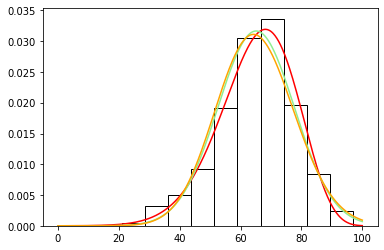

In [57]:
plt.hist(players['power_strength'], density = True, fill = False)
plt.plot(x, fitted_beta, 'r-')
plt.plot(x, fitted_norm, 'r-', color = 'lightgreen')
plt.plot(x, fitted_gamma, 'r-', color = 'orange')

In [58]:
# Analogiczna procedura dla atrybutu 'overall':

(array([  34.,  456., 1470., 3985., 4566., 3095., 1788.,  421.,   89.,
          12.]),
 array([40. , 45.3, 50.6, 55.9, 61.2, 66.5, 71.8, 77.1, 82.4, 87.7, 93. ]),
 <BarContainer object of 10 artists>)

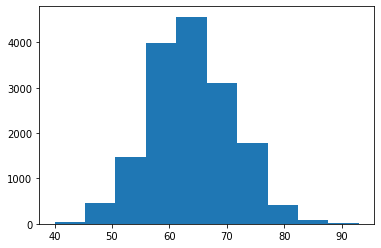

In [59]:
plt.hist(players['overall'])

In [60]:
skew(players['overall'])

0.13524935729373516

In [61]:
kurtosis(players['overall'])

0.0014676239246420586

In [62]:
f,g,h = stats.distributions.chi2.fit(players['overall'])
mean,var = stats.distributions.norm.fit(players['overall'])
loc,scale = stats.distributions.expon.fit(players['overall'])

In [63]:
x = np.linspace(40,100,300)
fitted_chi2 = stats.distributions.chi2.pdf(x,f,g,h)
fitted_norm2 = stats.distributions.norm.pdf(x,mean,var)
fitted_exp = stats.distributions.gamma.pdf(x,loc,scale)

c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\szymon tokarski\desktop\chessbot\chessbotenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  after removing the cwd from sys.path.


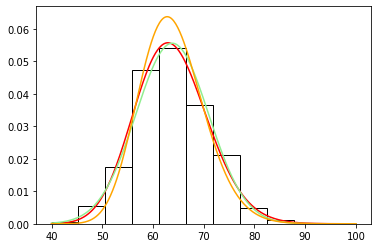

In [64]:
plt.hist(players['overall'], density = True, fill = False)
plt.plot(x, fitted_chi2, 'r-')
plt.plot(x, fitted_norm2, 'r-', color = 'lightgreen')
plt.plot(x, fitted_exp, 'r-', color = 'orange')

## Grupowanie danych 

In [65]:
# Tworzymy kolumnę z wartością procentową, jaką stanowi overall zawodnika w stosunku do jego potencjału. W ten sposób będziemy 
# mogli zobaczyć, którzy zawodnicy aspirują. Jeśli wartość zmiennej 'aspiration' jest większa od 1, to znaczy, że zawodnicy 
# rokują na przyszłość.
players['aspiration'] = players['potential'] / players['overall']
players[:20] # wyświetlamy pierwszych 20 obserwacji

age  height_cm  weight_kg  nationality            club_name  \
0    27        169         67    Argentina         FC Barcelona   
1    29        185         80     Portugal          Real Madrid   
2    30        180         80  Netherlands    FC Bayern München   
3    32        195         95       Sweden  Paris Saint-Germain   
4    28        193         92      Germany    FC Bayern München   
5    27        181         81      Uruguay         FC Barcelona   
6    30        170         65        Spain         FC Barcelona   
7    23        173         74      Belgium              Chelsea   
8    30        187         71  Netherlands    Manchester United   
9    29        183         79      Germany    FC Bayern München   
10   31        170         72       France    FC Bayern München   
11   28        177         72     Colombia    Manchester United   
12   24        183         74        Wales          Real Madrid   
13   25        184         78       Poland    FC Bayern München   
14   30        170         66      Germany    FC Bayern München   
15   28        183         75        Spain          Real Madrid   
16   29        183         79       Brazil  Paris Saint-Germain   
17   28        170         67        Spain      Manchester City   
18   28        174         65      Croatia          Real Madrid   
19   22        180         75     Colombia          Real Madrid   

               league_name  league_rank  overall  potential  value_eur  ...  \
0   Spain Primera Division          1.0       93         95  100500000  ...   
1   Spain Primera Division          1.0       92         92   79000000  ...   
2     German 1. Bundesliga          1.0       90         90   54500000  ...   
3           French Ligue 1          1.0       90         90   52500000  ...   
4     German 1. Bundesliga          1.0       90         90   63500000  ...   
5   Spain Primera Division          1.0       89         91   49500000  ...   
6   Spain Primera Division          1.0       89         89   36000000  ...   
7   English Premier League          1.0       88         90   40500000  ...   
8   English Premier League          1.0       88         88   40500000  ...   
9     German 1. Bundesliga          1.0       88         88   39000000  ...   
10    German 1. Bundesliga          1.0       88         88   33000000  ...   
11  English Premier League          1.0       88         88   46500000  ...   
12  Spain Primera Division          1.0       87         91   39000000  ...   
13    German 1. Bundesliga          1.0       87         89   44000000  ...   
14    German 1. Bundesliga          1.0       87         87   24500000  ...   
15  Spain Primera Division          1.0       87         87   31500000  ...   
16          French Ligue 1          1.0       87         87   29000000  ...   
17  English Premier League          1.0       87         87   36500000  ...   
18  Spain Primera Division          1.0       87         87   36500000  ...   
19  Spain Primera Division          1.0       86         92   35000000  ...   

     ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  aspiration  
0   62+3  62+3  62+3  62+3  54+3  45+3  45+3  45+3  54+3    1.021505  
1   63+3  63+3  63+3  63+3  57+3  52+3  52+3  52+3  57+3    1.000000  
2   64+3  64+3  64+3  64+3  55+3  46+3  46+3  46+3  55+3    1.000000  
3   65+3  65+3  65+3  61+3  56+3  55+3  55+3  55+3  56+3    1.000000  
4   40+3  40+3  40+3  36+3  36+3  38+3  38+3  38+3  36+3    1.000000  
5   67+3  67+3  67+3  67+3  62+3  57+3  57+3  57+3  62+3    1.022472  
6   77+3  77+3  77+3  76+3  70+3  63+3  63+3  63+3  70+3    1.000000  
7   64+2  64+2  64+2  62+2  54+2  46+2  46+2  46+2  54+2    1.022727  
8   63+3  63+3  63+3  60+3  54+3  48+3  48+3  48+3  54+3    1.000000  
9   84+2  84+2  84+2  81+2  81+2  79+2  79+2  79+2  81+2    1.000000  
10  63+2  63+2  63+2  63+2  53+2  44+2  44+2  44+2  53+2    1.000000  
11  60+2  60+2  60+2  58+2  56+2  55+2  55+2  55+2  56+2    1.000000  
12  75+2  75+

In [66]:
# Uwaga: Żeby lepiej dostrzec zależność między rokowaniem na przyszłość piłkarza, a wiekiem, to bierzemy tylko 2 kolumny: 
# 'aspiration' i 'age', a następnie dokonujemy sortowania piłkarzy malejąco względem 'aspiration':
rokowanie = players.loc[: , ['age', 'aspiration']]
rokowanie.sort_values(by='aspiration', ascending=False)

age  aspiration
15664   17    1.560000
16121   18    1.511111
15839   18    1.489796
16150   17    1.487805
15665   18    1.480000
...    ...         ...
7096    29    1.000000
7095    29    1.000000
7094    28    1.000000
7093    29    1.000000
16154   41    1.000000

[15916 rows x 2 columns]

In [67]:
# Dokonujemy grupowania dokonamy na poziomie umiejętności gry słabszą nogą zawodnika, a także jego ilości gwiazdek sztuczek:
rokowanie["weak_foot"]=players.weak_foot
rokowanie["skill_moves"]=players.skill_moves
grouped = rokowanie.groupby(['weak_foot', 'skill_moves'])
grouped
# Uwaga: w tym celu do podzbioru 'rokowanie' dokłożono zmienne 'weak_foot', a także 'skill_moves', wybieramy też tylko 10
# pierwszych obserwacji z nowo-powstałego zbioru danych.

In [68]:
# W ten spsób możemy z grupy sobie wyciągnąć nazwy kolumn:
grouped.obj.columns

Index(['age', 'aspiration', 'weak_foot', 'skill_moves'], dtype='object')

In [69]:
# Chcemy wyznaczyć średnią zmiennej 'aspiration':
grouped_aspiration = grouped['aspiration']
grouped_aspiration.agg('mean')

weak_foot  skill_moves
1          1              1.084955
           2              1.084537
           3              1.053375
2          1              1.078276
           2              1.092872
           3              1.076182
           4              1.055473
           5              1.054110
3          1              1.068721
           2              1.080480
           3              1.070701
           4              1.062382
           5              1.034534
4          1              1.073570
           2              1.062162
           3              1.057706
           4              1.057753
           5              1.037460
5          1              1.038961
           2              1.058896
           3              1.061941
           4              1.050528
           5              1.069610
Name: aspiration, dtype: float64

Wniosek: widzimy, że nie ma zawodników, którzy mają 4 lub 5 gwiazdek sztuczek przy zaledwie 1 gwiazdce słabszej nogi.

In [70]:
# W ten sposób możemy z kolei budować ramki danych zawierające stworzone przez nas cechy, ponieważ do funkcji agregującej możemy
# przekazać listę funkcji. Chcąc liczyć rozstęp między min a max, musimy sobie zdefiniować własną funkcję, nazwijmy ją 
# 'peak_to_peak':
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)
grouped_aspiration.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
weak_foot skill_moves                                  
1         1            1.084955  0.078743      0.313725
          2            1.084537  0.079643      0.415094
          3            1.053375  0.082593      0.228070
2         1            1.078276  0.080405      0.444444
          2            1.092872  0.082814      0.487805
          3            1.076182  0.080339      0.489796
          4            1.055473  0.054145      0.212121
          5            1.054110  0.064577      0.128205
3         1            1.068721  0.083184      0.560000
          2            1.080480  0.078832      0.511111
          3            1.070701  0.070194      0.434783
          4            1.062382  0.057311      0.310345
          5            1.034534  0.040057      0.095890
4         1            1.073570  0.081116      0.254545
          2            1.062162  0.069359      0.428571
          3            1.057706  0.067185      0.423077
          4            1.057753  0.055736      0.292308
          5            1.037460  0.045554      0.125000
5         1            1.038961       NaN      0.000000
          2            1.058896  0.061236      0.254902
          3            1.061941  0.070962      0.305085
          4            1.050528  0.040758      0.154930
          5            1.069610  0.016222      0.022942

In [71]:
# Możemy dodatkowo wykorzystać funkcję unstack(), powoduje ona, że mamy ramkę multiindeksu:
grouped_aspiration.agg(['mean', 'std', peak_to_peak]).unstack()

mean                                               std  \
skill_moves         1         2         3         4         5         1   
weak_foot                                                                 
1            1.084955  1.084537  1.053375       NaN       NaN  0.078743   
2            1.078276  1.092872  1.076182  1.055473  1.054110  0.080405   
3            1.068721  1.080480  1.070701  1.062382  1.034534  0.083184   
4            1.073570  1.062162  1.057706  1.057753  1.037460  0.081116   
5            1.038961  1.058896  1.061941  1.050528  1.069610       NaN   

                                                    peak_to_peak            \
skill_moves         2         3         4         5            1         2   
weak_foot                                                                    
1            0.079643  0.082593       NaN       NaN     0.313725  0.415094   
2            0.082814  0.080339  0.054145  0.064577     0.444444  0.487805   
3            0.078832  0.070194  0.057311  0.040057     0.560000  0.511111   
4            0.069359  0.067185  0.055736  0.045554     0.254545  0.428571   
5            0.061236  0.070962  0.040758  0.016222     0.000000  0.254902   

                                           
skill_moves         3         4         5  
weak_foot                                  
1            0.228070       NaN       NaN  
2            0.489796  0.212121  0.128205  
3            0.434783  0.310345  0.095890  
4            0.423077  0.292308  0.125000  
5            0.305085  0.154930  0.022942

In [72]:
# Możemy sobie wziąć pewien podzbiór z naszej tabeli, np. weźmy sobie tylko średnią:
srednia = grouped_aspiration.agg(['mean', 'std', peak_to_peak]).unstack()
srednia["mean"] 
# Uwaga: występują tu braki danych, ponieważ zawodnicy z 1 gwiazdką słabszej nogi nie mają 4 lub 5 gwiazdek sztuczek.

skill_moves         1         2         3         4         5
weak_foot                                                    
1            1.084955  1.084537  1.053375       NaN       NaN
2            1.078276  1.092872  1.076182  1.055473  1.054110
3            1.068721  1.080480  1.070701  1.062382  1.034534
4            1.073570  1.062162  1.057706  1.057753  1.037460
5            1.038961  1.058896  1.061941  1.050528  1.069610

In [73]:
# A w ten sposób możemy wybrać jedną kolumnę, np. tylko graczy z 5 gwiazdkami sztuczek:
srednia["mean"][5]

weak_foot
1         NaN
2    1.054110
3    1.034534
4    1.037460
5    1.069610
Name: 5, dtype: float64

In [74]:
# A tak wyciągamy jedynie wktor wartości:
srednia["mean"][5].values

array([       nan, 1.05411011, 1.03453437, 1.03745967, 1.06961031])

In [75]:
# Zmieniamy nazwy kolumn na polskie:
grouped_aspiration.agg([('średnia', 'mean'), ('odch_std', np.std), ('amplituda', peak_to_peak)])

średnia  odch_std  amplituda
weak_foot skill_moves                               
1         1            1.084955  0.078743   0.313725
          2            1.084537  0.079643   0.415094
          3            1.053375  0.082593   0.228070
2         1            1.078276  0.080405   0.444444
          2            1.092872  0.082814   0.487805
          3            1.076182  0.080339   0.489796
          4            1.055473  0.054145   0.212121
          5            1.054110  0.064577   0.128205
3         1            1.068721  0.083184   0.560000
          2            1.080480  0.078832   0.511111
          3            1.070701  0.070194   0.434783
          4            1.062382  0.057311   0.310345
          5            1.034534  0.040057   0.095890
4         1            1.073570  0.081116   0.254545
          2            1.062162  0.069359   0.428571
          3            1.057706  0.067185   0.423077
          4            1.057753  0.055736   0.292308
          5            1.037460  0.045554   0.125000
5         1            1.038961       NaN   0.000000
          2            1.058896  0.061236   0.254902
          3            1.061941  0.070962   0.305085
          4            1.050528  0.040758   0.154930
          5            1.069610  0.016222   0.022942

In [76]:
# Chcemy teraz wybrać pięć najwyższych wartości 'aspiration' z podziałem na grupy.
# Najpierw tworzymy funkcję wybierającą 5 największych wartości z danej kolumny.
def top(df, n=5, column='aspiration'):
    return rokowanie.sort_values(by=column)[-n:]
top(rokowanie, n=6) # jest posortowane od dołu

age  aspiration  weak_foot  skill_moves
14921   17    1.471698          3            2
15665   18    1.480000          3            2
16150   17    1.487805          2            2
15839   18    1.489796          2            3
16121   18    1.511111          3            2
15664   17    1.560000          3            1

In [77]:
# Następnie korzystamy z funkcji apply i wywołujemy top na grupie zbudowanej z 'aspiration', czyli dostajemy po 5 największych 
# wartości dla każdej wartości z 'aspiration':
rokowanie.groupby('aspiration').apply(top, n=3)
# Uwaga: bez zdefniowania n, n domyślnie jest równe 5.

age  aspiration  weak_foot  skill_moves
aspiration                                               
1.000000   15839   18    1.489796          2            3
           16121   18    1.511111          3            2
           15664   17    1.560000          3            1
1.011628   15839   18    1.489796          2            3
           16121   18    1.511111          3            2
...               ...         ...        ...          ...
1.511111   16121   18    1.511111          3            2
           15664   17    1.560000          3            1
1.560000   15839   18    1.489796          2            3
           16121   18    1.511111          3            2
           15664   17    1.560000          3            1

[1686 rows x 4 columns]

In [78]:
# Usuwamy indeks hierarchiczny:
rokowanie.groupby('aspiration', group_keys=False).apply(top) 

age  aspiration  weak_foot  skill_moves
15665   18    1.480000          3            2
16150   17    1.487805          2            2
15839   18    1.489796          2            3
16121   18    1.511111          3            2
15664   17    1.560000          3            1
...    ...         ...        ...          ...
15665   18    1.480000          3            2
16150   17    1.487805          2            2
15839   18    1.489796          2            3
16121   18    1.511111          3            2
15664   17    1.560000          3            1

[2810 rows x 4 columns]

In [79]:
# Resetujemy indeks:
rokowanie.groupby('aspiration', group_keys=False).apply(top).reset_index()

index  age  aspiration  weak_foot  skill_moves
0     15665   18    1.480000          3            2
1     16150   17    1.487805          2            2
2     15839   18    1.489796          2            3
3     16121   18    1.511111          3            2
4     15664   17    1.560000          3            1
...     ...  ...         ...        ...          ...
2805  15665   18    1.480000          3            2
2806  16150   17    1.487805          2            2
2807  15839   18    1.489796          2            3
2808  16121   18    1.511111          3            2
2809  15664   17    1.560000          3            1

[2810 rows x 5 columns]

# Modelowanie danych

## Przykłady uczenia nienadzorowanego (unsupervised learning) 

### Klasteryzacja niehierarchiczna

In [80]:
# Klasteryzacja dla napastników:
zbior_numeryczny = players[numeryczne]
zbior_numeryczny.insert(0, 'Name', players_names['short_name'], True)
zbior_numeryczny.insert(1, 'Position', players['team_position'], True)
zbior_numeryczny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15916 entries, 0 to 16154
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        15916 non-null  object 
 1   Position                    15916 non-null  object 
 2   age                         15916 non-null  int64  
 3   height_cm                   15916 non-null  int64  
 4   weight_kg                   15916 non-null  int64  
 5   league_rank                 15916 non-null  float64
 6   overall                     15916 non-null  int64  
 7   potential                   15916 non-null  int64  
 8   value_eur                   15916 non-null  int64  
 9   wage_eur                    15916 non-null  int64  
 10  international_reputation    15916 non-null  int64  
 11  weak_foot                   15916 non-null  int64  
 12  skill_moves                 15916 non-null  int64  
 13  team_jersey_number          159

In [81]:
zbior_numeryczny = zbior_numeryczny.drop(['defending_marking'], axis = 1)
zbior_numeryczny = zbior_numeryczny.dropna()
napastnicy = zbior_numeryczny[zbior_numeryczny['Position'] == 'ST']
napastnicy = napastnicy[napastnicy['overall'] > 75]
napastnicy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 3 to 880
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        44 non-null     object 
 1   Position                    44 non-null     object 
 2   age                         44 non-null     int64  
 3   height_cm                   44 non-null     int64  
 4   weight_kg                   44 non-null     int64  
 5   league_rank                 44 non-null     float64
 6   overall                     44 non-null     int64  
 7   potential                   44 non-null     int64  
 8   value_eur                   44 non-null     int64  
 9   wage_eur                    44 non-null     int64  
 10  international_reputation    44 non-null     int64  
 11  weak_foot                   44 non-null     int64  
 12  skill_moves                 44 non-null     int64  
 13  team_jersey_number          44 non-n

In [82]:
napastnicy = napastnicy.drop(['Position'], axis = 1)

In [83]:
X = preprocessing.normalize(napastnicy.loc[:, napastnicy.columns != 'Name'])

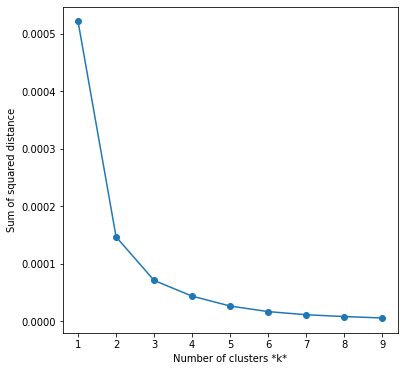

In [84]:
# Wybór ilości klastrów metodą łokcia:

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Optymalnie: k = 4, bo w tym miejscu suma wariancji przestaje gwałtownie maleć, a dokładanie kolejnych klastrów nie wprowadza 
już dużej poprawy. 

In [85]:
kmeans = KMeans(n_clusters=4, random_state=222).fit(X)

In [86]:
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3,
       2, 2, 2, 2, 1, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 3, 0])

In [87]:
# PCA do wizualizacji wyników:
pca = sklearn.decomposition.PCA(n_components=2).fit(X)

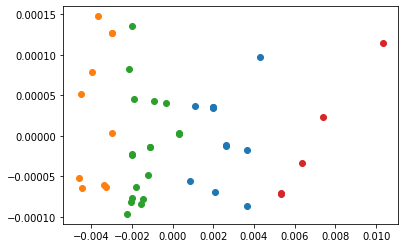

In [88]:
X2 = pca.transform(X)
x = X2[y_pred==0,0]
y = X2[y_pred==0,1]
plt.scatter(x,y)
x = X2[y_pred==1,0]
y = X2[y_pred==1,1]
plt.scatter(x,y)
x = X2[y_pred==2,0]
y = X2[y_pred==2,1]
plt.scatter(x,y)
x = X2[y_pred==3,0]
y = X2[y_pred==3,1]
plt.scatter(x,y)

### Klasteryzacja hierarchiczna

In [89]:
hierarchiczna = AgglomerativeClustering(n_clusters = 4).fit(X)

In [90]:
y_pred2 = hierarchiczna.fit_predict(X)
y_pred2

array([1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 0, 2,
       3, 0, 0, 3, 1, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0, 3, 0, 0, 2, 0],
      dtype=int64)

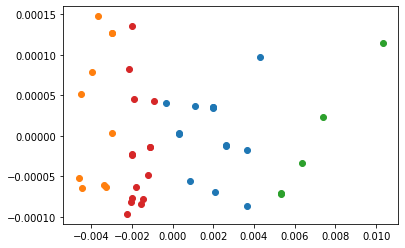

In [91]:
X2 = pca.transform(X)
x = X2[y_pred2==0,0]
y = X2[y_pred2==0,1]
plt.scatter(x,y)
x = X2[y_pred2==1,0]
y = X2[y_pred2==1,1]
plt.scatter(x,y)
x = X2[y_pred2==2,0]
y = X2[y_pred2==2,1]
plt.scatter(x,y)
x = X2[y_pred2==3,0]
y = X2[y_pred2==3,1]
plt.scatter(x,y)

In [92]:
# Jaki zawodnik jest w jakim klastrze dla danego algorytmu ?
napastnicy_cluster = napastnicy
napastnicy_cluster.insert(1, 'kmeans_cluster', kmeans.labels_, True)
napastnicy_cluster.insert(1, 'agg_cluster', hierarchiczna.labels_, True)
napastnicy_cluster[['Name','kmeans_cluster', 'agg_cluster']]

Name  kmeans_cluster  agg_cluster
3    Z. Ibrahimović               1            1
26        S. Agüero               1            1
35       K. Benzema               2            3
37      Diego Costa               1            1
52       G. Higuaín               1            1
61     K. Huntelaar               2            3
108    M. Balotelli               2            3
114     J. Martínez               2            3
123      S. Doumbia               2            3
139        M. Gomez               2            3
170         W. Bony               1            1
181     D. Berbatov               1            1
190     S. Kießling               2            3
207        C. Bacca               2            3
211       R. Lukaku               1            1
223     C. Immobile               2            3
239       A. Dzyuba               1            1
240       S. Rondón               2            3
262     E. Adebayor               2            3
264          Aduriz               1            1
295    Paco Alcácer               2            0
374         I. Olić               3            2
381     V. Ibišević               2            3
396       D. N'Doye               2            0
421      D. Welbeck               2            0
437      A. Kokorin               2            3
439      P. Lasogga               1            1
447    K. Mitroglou               0            0
484   Lee Dong Gook               3            2
499       A. Gignac               0            0
515          M. Sow               0            0
519     O. Toivonen               2            3
578       Agirretxe               0            0
648        G. Pellè               0            0
660       M. Erdinç               3            2
671    Luiz Adriano               3            2
676      S. Okazaki               0            0
729       A. Szalai               0            0
733            Éder               0            0
758        B. Ideye               2            3
778      C. Diabaté               0            0
804   R. Santa Cruz               0            0
850      O. Peralta               3            2
880       Wanderson               0            0

Wniosek: widzimy, że są różnice dla paru zawodników.

## Przykłady uczenia nadzorowanego (supervised learning) 

In [93]:
# Na początku zostanie wykonany model regresji liniowej, jak i wielomianowy za pomocą klasycznychi standartowych metod dla 
# zbioru 'numeryczne'. W dalszej części zaprezentowane zostaną metody regresji liniowej, model wielomianowy oraz lasy losowe z 
# wykorzystaniem bardziej zaawansowanych metod.

### I sposób - klasyczne wykorzystanie języka Python dla zbioru numeryczne

#### Model liniowy z wykorzystaniem regresji liniowej 

In [94]:
# Chcemy sprawdzić, czy ogólny poziom umiejętności piłkarzy, a więc 'overall' jest funkcją parametrów ze zbioru 'numeryczne'.
# Żeby sprawdzić, czy tak jest, zbudujmy model regresji liniowej. Zanim to wykonamy, podzielmy sobie zbiór 'numeryczne' na dwa 
# względem wartości 'overall' tak, aby w obu mieć podobną ilość piłkarzy. Podzielmy graczy na oddzielnie na karty brązowe, a 
# także srebrne ze złotymi. Następnie zbudujemy dwa osobne modele. Usuńmy ponadto 2 zmienne kategoryczne: 'Name' i 'Position'.

In [95]:
under_65 = players[numeryczne]
under_65 = under_65[(under_65['overall'] < 65)]
under_65.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8785 entries, 7288 to 16154
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         8785 non-null   int64  
 1   height_cm                   8785 non-null   int64  
 2   weight_kg                   8785 non-null   int64  
 3   league_rank                 8785 non-null   float64
 4   overall                     8785 non-null   int64  
 5   potential                   8785 non-null   int64  
 6   value_eur                   8785 non-null   int64  
 7   wage_eur                    8785 non-null   int64  
 8   international_reputation    8785 non-null   int64  
 9   weak_foot                   8785 non-null   int64  
 10  skill_moves                 8785 non-null   int64  
 11  team_jersey_number          8785 non-null   float64
 12  contract_valid_until        8785 non-null   float64
 13  pace                        8

In [96]:
over_64 = players[numeryczne]
over_64 = over_64[(over_64['overall'] > 64)]
over_64.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7131 entries, 0 to 7287
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         7131 non-null   int64  
 1   height_cm                   7131 non-null   int64  
 2   weight_kg                   7131 non-null   int64  
 3   league_rank                 7131 non-null   float64
 4   overall                     7131 non-null   int64  
 5   potential                   7131 non-null   int64  
 6   value_eur                   7131 non-null   int64  
 7   wage_eur                    7131 non-null   int64  
 8   international_reputation    7131 non-null   int64  
 9   weak_foot                   7131 non-null   int64  
 10  skill_moves                 7131 non-null   int64  
 11  team_jersey_number          7131 non-null   float64
 12  contract_valid_until        7131 non-null   float64
 13  pace                        7131 

In [97]:
# Tworzymy model regresji liniowej dla podzbioru 'under_65':
mnk = sklearn.linear_model.LinearRegression() # w ten sposób wyświetlimy parametry modelu
mnk

LinearRegression()

In [98]:
X = under_65.drop(columns=['overall'],axis=1) # X - zbiór z predyktorami (zm. objaśniającymi)
y = under_65[['overall']] # y - zmienna celu (zm. objaśniana)
mnk.fit(X,y) # Chcemy nauczyć model, robimy to za pomocą fit   

LinearRegression()

In [99]:
mnk.intercept_ # to jest wyraz wolny
mnk.coef_ # to są wartości współczynników dla zm. niezależnych

array([[ 3.28902721e-01, -1.37173732e-03,  3.31518928e-03,
        -1.28887918e-01,  3.36941985e-01,  1.18909423e-05,
        -5.98702910e-05, -2.18791629e-01,  1.31640583e-02,
         3.66940385e-01, -3.30382044e-03, -2.19158150e-02,
        -5.83528223e-02,  1.38525002e-01,  3.78559941e-02,
         1.35732857e-01,  1.62193365e-01,  5.54929576e-02,
         7.99611700e-02,  7.56067562e-02,  1.16260545e-02,
         1.02446688e-01, -5.59947184e-02,  5.87413549e-02,
         5.80885025e-03, -5.09630566e-02,  2.28771404e-02,
         2.82522884e-03, -2.99687587e-03, -6.85485221e-02,
         2.80864914e-03, -1.01008479e-02, -2.00995320e-02,
         1.66348348e-02,  3.03430278e-02,  4.27705508e-02,
        -6.35165383e-03,  2.73597782e-02, -1.95649297e-03,
        -1.89368983e-02, -2.91154307e-03, -6.03771458e-03,
        -3.49886932e-03, -3.26372217e-02, -1.00517429e-02,
        -2.65396172e-02, -2.06238641e-02, -1.10248764e-02,
         1.68096240e-03, -2.10160770e-02, -3.70618069e-0

In [100]:
# Współczynnik determinacji R2 (f-cja score to robi):
mnk.score(X,y)
# Im bliżej 1 ma R^2, tym lepsze jest dopasowanie modelu. U nas wartość to 0.996, więc jest bardzo dobre dopasowanie.

0.884365869684105

In [101]:
# Teraz chcemy zobaczyć, jak wygląda predykcja dla całego zbioru:
y_pred = mnk.predict(X)

In [102]:
# Sprawdźmy wartości dla pierwszych 10 zmiennych z predykcji:
y_pred[0:9]

array([[65.53390735],
       [66.27172227],
       [66.4054552 ],
       [65.80903028],
       [65.35692311],
       [65.98249261],
       [65.94362873],
       [66.14161664],
       [66.50724938]])

In [103]:
# A tu dla porównania sprawdźmy wartości dla pierwszych 10 zmiennych rzeczywistych:
y[0:9]

overall
7288       64
7289       64
7290       64
7291       64
7292       64
7293       64
7294       64
7295       64
7296       64

In [104]:
# II sposób na obliczenie R2, z wykorzystaniem pakietu sklearn:
sklearn.metrics.r2_score(y, y_pred)

0.884365869684105

In [105]:
# Obliczmy jeszcze inne miary błędów dopasowania:

In [106]:
# 1. MSE - średni błąd kwadratowy:
sklearn.metrics.mean_squared_error(y, y_pred)  

2.185220717880195

In [107]:
# 2. MAE - średni błąd całkowity:
sklearn.metrics.mean_absolute_error(y, y_pred)

1.134778895334899

In [108]:
#3. MedAE - błąd medianowy:
sklearn.metrics.median_absolute_error(y, y_pred)

0.923907455093925

In [109]:
# Chcemy polepszyć zdolność predykcyjną modelu, dlatego podzielimy cały zbiór na uczący i testowy. Zatem dzielimy zbiór na próbę
# uczącą (80%) i testową (20%).
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(7028, 57)
(1757, 57)
(7028, 1)
(1757, 1)


In [110]:
# Stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby oraz oblicza miary błędów dopasowania:
def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    model.fit(X_ucz, y_ucz)
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
        "MEDAE_u": medae(y_ucz, y_ucz_pred),
        "MEDAE_t": medae(y_test, y_test_pred)
    }

In [111]:
# Przedstawiamy działanie powyższej funkcji oraz wyniki:
model_names = ["Reg. liniowa"] # tworzymy zawsze etykietę dla naszej ramki danych
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
df_results_errors = pd.DataFrame(res, index=model_names)
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t    MAE_u     MAE_t  \
Reg. liniowa   0.882672   0.889753  2.206777  2.116267  1.13527  1.129027   

              MEDAE_u   MEDAE_t  
Reg. liniowa  0.91571  0.928784

In [112]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 30% - testowy, 70% - uczący:
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)
model_names = ["Reg. liniowa 70"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70, X_test70, y_ucz70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors 

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa      0.882672   0.889753  2.206777  2.116267  1.135270  1.129027   
Reg. liniowa 70   0.882448   0.887627  2.210341  2.147481  1.136524  1.131305   

                  MEDAE_u   MEDAE_t  
Reg. liniowa     0.915710  0.928784  
Reg. liniowa 70  0.919612  0.926288

Wniosek: R^2 minimalnie zmalało, więc dla większej próby danych model jest minimalnie gorszy.

In [113]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 35% - testowy, 65% - uczący:
X_ucz65, X_test65, y_ucz65, y_test65 = sklearn.model_selection.train_test_split(X, y, test_size=0.35, random_state=12345)
model_names = ["Reg. liniowa 65"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz65, X_test65, y_ucz65, y_test65)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 25% - testowy, 75% - uczący:
X_ucz75, X_test75, y_ucz75, y_test75 = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=12345)
model_names = ["Reg. liniowa 75"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz75, X_test75, y_ucz75, y_test75)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 15% - testowy, 85% - uczący:
X_ucz85, X_test85, y_ucz85, y_test85 = sklearn.model_selection.train_test_split(X, y, test_size=0.15, random_state=12345)
model_names = ["Reg. liniowa 85"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz85, X_test85, y_ucz85, y_test85)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors 

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa      0.882672   0.889753  2.206777  2.116267  1.135270  1.129027   
Reg. liniowa 70   0.882448   0.887627  2.210341  2.147481  1.136524  1.131305   
Reg. liniowa 65   0.880968   0.889416  2.229453  2.123801  1.142031  1.124972   
Reg. liniowa 75   0.882381   0.889231  2.211264  2.122971  1.136143  1.128920   
Reg. liniowa 85   0.882929   0.891178  2.214138  2.040161  1.138717  1.109908   

                  MEDAE_u   MEDAE_t  
Reg. liniowa     0.915710  0.928784  
Reg. liniowa 70  0.919612  0.926288  
Reg. liniowa 65  0.925197  0.918835  
Reg. liniowa 75  0.914708  0.928806  
Reg. liniowa 85  0.923415  0.924486

In [114]:
# Teraz sprawdzamy zawodników, którzy mają karty srebrne i złote:
X = over_64.drop(columns=['overall'],axis=1) # X - zbiór z predyktorami (zm. objaśniającymi)
y = over_64[['overall']] # y - zmienna celu (zm. objaśniana)
mnk.fit(X,y) # Chcemy nauczyć model, robimy to za pomocą fit  

LinearRegression()

In [115]:
mnk.intercept_ 
mnk.coef_ 
mnk.score(X,y)

0.9335792094395744

Wniosek: u nas wartość to 0.933, więc jest świetne dopasowanie.

In [116]:
y_pred = mnk.predict(X)

In [117]:
# Sprawdźmy wartości dla pierwszych 10 zmiennych z predykcji:
y_pred[0:9]

array([[107.36321444],
       [ 97.83077034],
       [ 91.98430582],
       [ 93.54596977],
       [ 93.92071018],
       [ 93.81637116],
       [ 91.85797343],
       [ 86.93464509],
       [ 89.79540837]])

In [118]:
# A tu dla porównania sprawdźmy wartości dla pierwszych 10 zmiennych rzeczywistych:
y[0:9]

overall
0       93
1       92
2       90
3       90
4       90
5       89
6       89
7       88
8       88

In [119]:
# Obliczmy jeszcze inne miary błędów dopasowania:
# 1. MSE - średni błąd kwadratowy:
sklearn.metrics.mean_squared_error(y, y_pred)
# 2. MAE - średni błąd całkowity:
sklearn.metrics.mean_absolute_error(y, y_pred)
#3. MedAE - błąd medianowy:
sklearn.metrics.median_absolute_error(y, y_pred)

0.731722811652844

In [120]:
# Chcemy polepszyć zdolność predykcyjną modelu, dlatego podzielimy cały zbiór na uczący i testowy. Zatem dzielimy zbiór na próbę
# uczącą (80%) i testową (20%).
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(5704, 57)
(1427, 57)
(5704, 1)
(1427, 1)


In [121]:
# Stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby oraz oblicza miary błędów dopasowania:
def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    model.fit(X_ucz, y_ucz)
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
        "MEDAE_u": medae(y_ucz, y_ucz_pred),
        "MEDAE_t": medae(y_test, y_test_pred)
    }

In [122]:
# Przedstawiamy działanie powyższej funkcji oraz wyniki:
model_names = ["Reg. liniowa"] # tworzymy zawsze etykietę dla naszej ramki danych
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
df_results_errors = pd.DataFrame(res, index=model_names)
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa    0.93224   0.937463  1.318628  1.302467  0.892453  0.897454   

               MEDAE_u   MEDAE_t  
Reg. liniowa  0.722615  0.758477

In [123]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 30% - testowy, 70% - uczący:
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)
model_names = ["Reg. liniowa 70"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70, X_test70, y_ucz70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors 

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa      0.932240   0.937463  1.318628  1.302467  0.892453  0.897454   
Reg. liniowa 70   0.930753   0.938636  1.345310  1.254139  0.900879  0.880520   

                  MEDAE_u   MEDAE_t  
Reg. liniowa     0.722615  0.758477  
Reg. liniowa 70  0.730601  0.720610

Wniosek: R^2 minimalnie wzrosło, więc dla większej próby danych model jest minimalnie lepszy.

In [124]:
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 35% - testowy, 65% - uczący:
X_ucz65, X_test65, y_ucz65, y_test65 = sklearn.model_selection.train_test_split(X, y, test_size=0.35, random_state=12345)
model_names = ["Reg. liniowa 65"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz65, X_test65, y_ucz65, y_test65)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 25% - testowy, 75% - uczący:
X_ucz75, X_test75, y_ucz75, y_test75 = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=12345)
model_names = ["Reg. liniowa 75"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz75, X_test75, y_ucz75, y_test75)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Sprawdźmy wpływ podziału na zb. treningowy i uczący, tu: 15% - testowy, 85% - uczący:
X_ucz85, X_test85, y_ucz85, y_test85 = sklearn.model_selection.train_test_split(X, y, test_size=0.15, random_state=12345)
model_names = ["Reg. liniowa 85"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz85, X_test85, y_ucz85, y_test85)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors 

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
Reg. liniowa      0.932240   0.937463  1.318628  1.302467  0.892453  0.897454   
Reg. liniowa 70   0.930753   0.938636  1.345310  1.254139  0.900879  0.880520   
Reg. liniowa 65   0.930341   0.938244  1.346608  1.264553  0.902045  0.877771   
Reg. liniowa 75   0.931842   0.937458  1.326280  1.285827  0.893569  0.894980   
Reg. liniowa 85   0.932751   0.937206  1.316294  1.298452  0.891283  0.895037   

                  MEDAE_u   MEDAE_t  
Reg. liniowa     0.722615  0.758477  
Reg. liniowa 70  0.730601  0.720610  
Reg. liniowa 65  0.733930  0.714404  
Reg. liniowa 75  0.722405  0.747512  
Reg. liniowa 85  0.730043  0.756682

In [125]:
# Sprawdźmy ponadto działanie regresji liniowej dla danych wystandaryzowanych, jak i znormalizowanych dla jednego wybranego  
# podziału danych na zbiór testowy i treningowy:

In [126]:
# Dane wystandaryzowane:
Xu_std = (X_ucz - X_ucz.mean())/X_ucz.std()
Xt_std = (X_test - X_test.mean())/X_test.std()
yu_std = (y_ucz - y_ucz.mean())/y_ucz.std()
yt_std = (y_test - y_test.mean())/y_test.std()

In [127]:
model_names = ["R. lin."]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
results_errors = pd.DataFrame(result, index=model_names)

In [128]:
model_names = ["R. lin. std"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std, Xt_std, yu_std, yt_std)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))
results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.        0.93224   0.937463  1.318628  1.302467  0.892453  0.897454   
R. lin. std    0.93224   0.937172  0.067748  0.062784  0.202289  0.196917   

              MEDAE_u   MEDAE_t  
R. lin.      0.722615  0.758477  
R. lin. std  0.163792  0.161028

In [129]:
# Dane znormalizowane (x - x.min)/(x.max-x.min):
Xu_n = (X_ucz - X_ucz.min())/(X_ucz.max() - X_ucz.min())
Xt_n = (X_test - X_test.min())/(X_test.max() - X_test.min())
yu_n = (y_ucz - y_ucz.min())/(y_ucz.max() - y_ucz.min())
yt_n = (y_test - y_test.min())/(y_test.max() - y_test.min())

In [130]:
# Przedstawiamy działanie powyższej funkcji oraz wyniki dla danych znormalizowanych:
model_names = ["R. lin. norm"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_n, Xt_n, yu_n, yt_n)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))
results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.         0.93224   0.937463  1.318628  1.302467  0.892453  0.897454   
R. lin. std     0.93224   0.937172  0.067748  0.062784  0.202289  0.196917   
R. lin. norm    0.93224   0.772076  0.001682  0.007595  0.031873  0.061210   

               MEDAE_u   MEDAE_t  
R. lin.       0.722615  0.758477  
R. lin. std   0.163792  0.161028  
R. lin. norm  0.025808  0.041230

In [131]:
# Na koniec rozważania modelu liniowego ustawmy jeszcze tylko pewien random state: 
X_ucz_r123, X_test_r123, y_ucz_r123, y_test_r123 = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state= 123)

In [132]:
model_names = ["R. lin. r123"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz_r123, X_test_r123, y_ucz_r123, y_test_r123)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))
results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u     MAE_t  \
R. lin.        0.932240   0.937463  1.318628  1.302467  0.892453  0.897454   
R. lin. std    0.932240   0.937172  0.067748  0.062784  0.202289  0.196917   
R. lin. norm   0.932240   0.772076  0.001682  0.007595  0.031873  0.061210   
R. lin. r123   0.933869   0.931810  1.305508  1.346273  0.885605  0.913426   

               MEDAE_u   MEDAE_t  
R. lin.       0.722615  0.758477  
R. lin. std   0.163792  0.161028  
R. lin. norm  0.025808  0.041230  
R. lin. r123  0.722317  0.753811

In [133]:
# Dane wystandaryzowane:
Xu_std_r123 = (X_ucz_r123 - X_ucz_r123.mean())/X_ucz_r123.std()
Xt_std_r123 = (X_test_r123 - X_test_r123.mean())/X_test_r123.std()
yu_std_r123 = (y_ucz_r123 - y_ucz_r123.mean())/y_ucz_r123.std()
yt_std_r123 = (y_test_r123 - y_test_r123.mean())/y_test_r123.std()

In [134]:
model_names = ["R. lin. std r123"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_std_r123, Xt_std_r123, yu_std_r123, yt_std_r123)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))
results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
R. lin.            0.932240   0.937463  1.318628  1.302467  0.892453   
R. lin. std        0.932240   0.937172  0.067748  0.062784  0.202289   
R. lin. norm       0.932240   0.772076  0.001682  0.007595  0.031873   
R. lin. r123       0.933869   0.931810  1.305508  1.346273  0.885605   
R. lin. std r123   0.933869   0.931399  0.066120  0.068553  0.199304   

                     MAE_t   MEDAE_u   MEDAE_t  
R. lin.           0.897454  0.722615  0.758477  
R. lin. std       0.196917  0.163792  0.161028  
R. lin. norm      0.061210  0.025808  0.041230  
R. lin. r123      0.913426  0.722317  0.753811  
R. lin. std r123  0.206171  0.162556  0.170277

In [135]:
# Dane znormalizowane (x - x.min)/(x.max-x.min):
Xu_n_r123 = (X_ucz_r123 - X_ucz_r123.min())/(X_ucz_r123.max() - X_ucz_r123.min())
Xt_n_r123 = (X_test_r123 - X_test_r123.min())/(X_test_r123.max() - X_test_r123.min())
yu_n_r123 = (y_ucz_r123 - y_ucz_r123.min())/(y_ucz_r123.max() - y_ucz_r123.min())
yt_n_r123 = (y_test_r123 - y_test_r123.min())/(y_test_r123.max() - y_test_r123.min())

In [136]:
model_names = ["R. lin. norm r123"]
result = [fit_regression(sklearn.linear_model.LinearRegression(), Xu_n_r123, Xt_n_r123, yu_n_r123, yt_n_r123)]
results_errors = results_errors.append(pd.DataFrame(result, index=model_names))
results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
R. lin.             0.932240   0.937463  1.318628  1.302467  0.892453   
R. lin. std         0.932240   0.937172  0.067748  0.062784  0.202289   
R. lin. norm        0.932240   0.772076  0.001682  0.007595  0.031873   
R. lin. r123        0.933869   0.931810  1.305508  1.346273  0.885605   
R. lin. std r123    0.933869   0.931399  0.066120  0.068553  0.199304   
R. lin. norm r123   0.933869   0.692139  0.001665  0.009725  0.031629   

                      MAE_t   MEDAE_u   MEDAE_t  
R. lin.            0.897454  0.722615  0.758477  
R. lin. std        0.196917  0.163792  0.161028  
R. lin. norm       0.061210  0.025808  0.041230  
R. lin. r123       0.913426  0.722317  0.753811  
R. lin. std r123   0.206171  0.162556  0.170277  
R. lin. norm r123  0.076300  0.025797  0.064091

Podsumowanie wykonanych modelów regresji liniowej:
Modele wykonano najpierw oddzielnie dla kart brązowych i pozostałych. Potem dla tak podzielonych kart podzielono cały zbiór na 
zbiory: uczący i testowy w 5 różnych proporcjach podziału. Następnie sprawdzono wyniki metryk dla danych po standaryzacji, jak i 
normalizacji. Na koniec sprawdzono wartości metryk w trzech przypadkach dla nowego random state.
1. Współczynnik R-kwadrat - miara jakości dopasowania modelu. Mówi on o tym, jaki procent jednej zmiennej wyjaśnia zmienność 
                            drugiej zmiennej.
   Zarówno dla kart brązowych, jak i pozostałych podział na próbę uczącą i testową nie zmienił zbytnio wyników. W zaokrągleniu
   do części tysięcznych dla zawodników brązowych współczynnik R-kwadrat wynosił 0.996, zaś dla pozostałych 0.999. W obu
   przypadkach oznacza to świetne dopasowanie modelu.
2. MSE - średni błąd kwadratowy
   W tym przypadku widzimy większe dysproporcje pomiędzy rodzajami kart.Dla kart brązowych MSE = 0.08, natomiast dla kart 
   pozostałych MSE = 0.02. Dla danych znormalizowanych błąd jest praktycznie zerowcy, zaś dla danych wystandaryzowanych MSE jest
   minimalnie większe, jednak wciąż bardzo małe, około 0.001.
3. MAE - średni błąd bezwzględny
   Tu ponownie widać różnice w wartościach, zależnie od przyjętego podziału. Dla brązowych zawodników MAE = 0.2, dla pozostałych
   MAE = 0.11. Dla danych wystandaryzowanych i znormalizowanych wartości te są znów mniejsze, wynoszą one w obu przypadkach
   poniżej wartości 0.01.
4. MEDAE - błąd medianowy
   Dla ostatniej rozpatrywanej metryki sytuacja jest analogiczna jak dla MAE i MSE. Znów największa wartość niezależnie 
   (w przybliżeniu do części tysięcznych) jest dla kart brązowych i wynosi 0.15. Nieco mniej jest dla pozostałych kart, tu mamy 
   wyniki około 0.08. Dla danych wystandaryzowanych jest to 0.02, a dla znormalizowanych jest to 0.01.

#### Model wielomianowy

In [137]:
# Korzystamy z funkcji PolynomialFeatures ze stopniem 2, aby wygenerować nowe cechy, które są iloczynem cech bazowych, np. 
# [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2].
wielomian2_cechy = PolynomialFeatures(degree=2, include_bias=False)
wielomian2_cechy.fit_transform(np.array([[2,3,5],[1,2,3]]))

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.]])

In [138]:
wielomian2_cechy.powers_.T

array([[1, 0, 0, 2, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 2]], dtype=int64)

In [139]:
# Spróbujemy dla naszego zbioru wygenerować tę cechę. W tym celu zbudujmy model wielomianowy przekształcając zbiór treningowy 
# predyktorów X_ucz, a także zbiór testowy predyktorów X_test.
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz70 = wielomian2.fit_transform(X_ucz70)
X2_test70 = wielomian2.fit_transform(X_test70)

In [140]:
model_names = ["Reg. liniowa 70 polyf"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_ucz70, 
                      X2_test70, 
                      y_ucz70, 
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa            0.932240   0.937463  1.318628  1.302467  0.892453   
Reg. liniowa 70         0.930753   0.938636  1.345310  1.254139  0.900879   
Reg. liniowa 65         0.930341   0.938244  1.346608  1.264553  0.902045   
Reg. liniowa 75         0.931842   0.937458  1.326280  1.285827  0.893569   
Reg. liniowa 85         0.932751   0.937206  1.316294  1.298452  0.891283   
Reg. liniowa 70 polyf   0.984759   0.948057  0.296103  1.061587  0.428195   

                          MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa           0.897454  0.722615  0.758477  
Reg. liniowa 70        0.880520  0.730601  0.720610  
Reg. liniowa 65        0.877771  0.733930  0.714404  
Reg. liniowa 75        0.894980  0.722405  0.747512  
Reg. liniowa 85        0.895037  0.730043  0.756682  
Reg. liniowa 70 polyf  0.669653  0.354470  0.511499

W powyższej tabeli widzimy wyniki metryk dla wcześniejszych modeli liniowych, jak i modelu wilomianowego z podziałem na: 
próbę uczącą - 80% i testową - 30%. Widzimy, że model ma jeszcze lepsze dopasowanie niż wcześniejsze już dobre modele.

### II sposób modelowania  - zaimplementowanie złożonej funkcji wyliczającej jednocześnie trzy modele, zarówno dla zbioru numeryczne, jak i wejściowego zbioru players po wykonaniu kodowania One Hot Encoding

In [141]:
# Skalujemy dane numeryczne oraz kodujemy dane kategoryczne:

X = StandardScaler().fit_transform(players[numeryczne].drop(columns=['overall'],axis=1))
y = players['overall']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numeryczne.drop('overall')),
    ('nienum', OneHotEncoder(handle_unknown='ignore'), nienumeryczne)
])

X_z_cat = full_pipeline.fit_transform(players.drop(columns=['overall'],axis=1))

In [142]:
# Tworzymy funkcje liczące nasze modele:

class Model:
    def __init__(self):
        self.podzial = []
        self.nazwa_podzialu = []
    
    def DodajPodzial(self, X, y, nazwa, podzial, seed):
        if podzial == 0.0:
            self.podzial.append([X,X,y,y])
        else:
            self.podzial.append(train_test_split(X, y, test_size=podzial, random_state=seed))  
        self.nazwa_podzialu.append(nazwa)
        
    def TrenujModele(self, model):
        maximum = len(self.podzial)
        
        modele = []
        for j, p in enumerate(self.podzial):
            X_ucz, X_test, y_ucz, y_test = p
            print("Trenujemy model {0} / {1}".format(j + 1, maximum))
            modele.append(clone(model))
            modele[j].fit(X_ucz, y_ucz.values.ravel())
        
        return modele
        
    def __Bledy(self, X,y, model):
        pred = model.predict(X)
        y = y.values.ravel()
        
        r2 = sklearn.metrics.r2_score
        mse = sklearn.metrics.mean_squared_error
        mae = sklearn.metrics.mean_absolute_error
        medae = sklearn.metrics.median_absolute_error
            
        return {
            "r_score": r2(y, pred),
            "MSE": mse(y, pred),
            "MAE": mae(y, pred),
            "MEDAE": medae(y, pred)
            }
    
    def CrossValidation(self, X, y, modele):
        ilosc = len(modele)
        wyniki = pd.DataFrame()
        for i, model in enumerate(modele):
            print("Obliczamy walidację dla modelu {0} / {1}".format(i + 1, ilosc))
            
            scores = cross_val_score(modele[i], X, y.values.ravel(),scoring="neg_mean_squared_error", cv=10, n_jobs = -1)
            n_scores = np.sqrt(-scores)
            
            wyniki = wyniki.append(pd.DataFrame(
                {"Średnia": n_scores.mean(),
                 "Odchylenie standardowe": n_scores.std()}, 
                index=["{0}".format(self.nazwa_podzialu[i])]))
            
        return wyniki
    
    def Wyniki(self, nazwa, modele):
        ilosc = len(modele)
        wynikiTestowy = pd.DataFrame()
        wynikiUczacy = pd.DataFrame()
        for i, model in enumerate(modele):
            print("Obliczamy wyniki dla modelu {0} / {1}".format(i + 1, ilosc))
            X_ucz, X_test, y_ucz, y_test = self.podzial[i]
            
            bledyTestowy = self.__Bledy(X_test, y_test, model)
            wynikiTestowy = wynikiTestowy.append(pd.DataFrame(bledyTestowy, index=["{0}.{1}".format(nazwa, self.nazwa_podzialu[i])]))
            
            bledyUczacy = self.__Bledy(X_ucz, y_ucz, model)
            wynikiUczacy = wynikiUczacy.append(pd.DataFrame(bledyUczacy, index=["{0}.{1}".format(nazwa, self.nazwa_podzialu[i])]))
            
        return wynikiUczacy, wynikiTestowy

In [143]:
model = Model()
model.DodajPodzial(X,       y, "Bez_Podzialu",          0.0, 12345)
model.DodajPodzial(X,       y, "65",                    0.35, 12345)
model.DodajPodzial(X,       y, "70",                    0.30, 12345)
model.DodajPodzial(X,       y, "75",                    0.25, 12345)
model.DodajPodzial(X,       y, "85",                    0.15, 12345)
model.DodajPodzial(X_z_cat, y, "Bez_Podzialu z kat.",   0.0, 12345)
model.DodajPodzial(X_z_cat, y, "65 z kat.",             0.35, 12345)
model.DodajPodzial(X_z_cat, y, "70 z kat.",             0.30, 12345)
model.DodajPodzial(X_z_cat, y, "75 z kat.",             0.25, 12345)
model.DodajPodzial(X_z_cat, y, "85 z kat.",             0.15, 12345)

param_grid = [
    {'n_estimators': [50, 60, 70, 80], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [10,20,30,40], 'max_features': [2, 4, 8, 16]},
  ]

lasy = model.TrenujModele(GridSearchCV(
                            RandomForestRegressor(random_state=12345), 
                            param_grid, cv=5, scoring='neg_mean_squared_error',  
                            return_train_score=True, n_jobs = -1))

wynikiLasyUczacy, wynikiLasyTestowy = model.Wyniki("LasyLosowe", lasy)

# Ponieważ to się bardzo długo oblicza oraz wyniki są bardzo podobne, to dostajemy dokladnie te same wyniki dla każdego modelu. 
# Do prezentacji można zrobić dla 5 przedziałów, ale teraz to bez sensu. Tak powinno być 
# walidacjaLin = model.CrossValidation(X,y,lin), a i walidacja najlepiej jak jest wykonana na całym zbiorze, to musimy osobno ją 
# zrobić dla modeli trenowanych tylko na numerycznych i dla modeli trenowanych z kategorycznymi czyli lin[0:3] i lin[4:7].
walidacjaLas = model.CrossValidation(X,y,[lasy[0]])

#a to wyjatkowo dlugo liczy, nie warto czekac 
#walidacjaLasCat = model.CrossValidation(X_z_cat,y,[lasy[4]])

w_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
w_X_z_cat = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_z_cat)

#dodajemy zbiory dla regresji wielomianowej
model.DodajPodzial(w_X,       y, "Wielomianowa.Bez_Podzialu",          0.0, 12345)
model.DodajPodzial(w_X,       y, "Wielomianowa.65",                    0.35, 12345)
model.DodajPodzial(w_X,       y, "Wielomianowa.70",                    0.30, 12345)
model.DodajPodzial(w_X,       y, "Wielomianowa.75",                    0.25, 12345)
model.DodajPodzial(w_X,       y, "Wielomianowa.85",                    0.15, 12345)

#wielomianowa dla kategoryycznych trwa za dlugo to tez uruchomie na koncu xd
#model.DodajPodzial(w_X_z_cat, y, "Wielomianowa.Bez_Podzialu z kat.",   0.0, 12345)
#model.DodajPodzial(w_X_z_cat, y, "Wielomianowa.65 z kat.",             0.35, 12345)
#model.DodajPodzial(w_X_z_cat, y, "Wielomianowa.70 z kat.",             0.30, 12345)
#model.DodajPodzial(w_X_z_cat, y, "Wielomianowa.75 z kat.",             0.25, 12345)
#model.DodajPodzial(w_X_z_cat, y, "Wielomianowa.85 z kat.",             0.15, 12345)

lin = model.TrenujModele(LinearRegression(n_jobs = -1))
wynikiLinUczacy, wynikiLinTestowy = model.Wyniki("RegresjaLiniowa", lin)

walidacjaLin = model.CrossValidation(X,y,[lin[0]])
walidacjaLinCat = model.CrossValidation(X_z_cat,y,[lin[4]])

Trenujemy model 1 / 10
Trenujemy model 2 / 10
Trenujemy model 3 / 10
Trenujemy model 4 / 10
Trenujemy model 5 / 10
Trenujemy model 6 / 10
Trenujemy model 7 / 10
Trenujemy model 8 / 10
Trenujemy model 9 / 10
Trenujemy model 10 / 10
Obliczamy wyniki dla modelu 1 / 10
Obliczamy wyniki dla modelu 2 / 10
Obliczamy wyniki dla modelu 3 / 10
Obliczamy wyniki dla modelu 4 / 10
Obliczamy wyniki dla modelu 5 / 10
Obliczamy wyniki dla modelu 6 / 10
Obliczamy wyniki dla modelu 7 / 10
Obliczamy wyniki dla modelu 8 / 10
Obliczamy wyniki dla modelu 9 / 10
Obliczamy wyniki dla modelu 10 / 10
Obliczamy walidację dla modelu 1 / 1
Trenujemy model 1 / 15
Trenujemy model 2 / 15
Trenujemy model 3 / 15
Trenujemy model 4 / 15
Trenujemy model 5 / 15
Trenujemy model 6 / 15
Trenujemy model 7 / 15
Trenujemy model 8 / 15
Trenujemy model 9 / 15
Trenujemy model 10 / 15
Trenujemy model 11 / 15
Trenujemy model 12 / 15
Trenujemy model 13 / 15
Trenujemy model 14 / 15
Trenujemy model 15 / 15
Obliczamy wyniki dla modelu 1 

In [144]:
wynikiLinUczacy

r_score       MSE       MAE  \
RegresjaLiniowa.Bez_Podzialu               0.941044  3.037863  1.341207   
RegresjaLiniowa.65                         0.941255  3.047298  1.343489   
RegresjaLiniowa.70                         0.941256  3.054597  1.344758   
RegresjaLiniowa.75                         0.940961  3.068821  1.346956   
RegresjaLiniowa.85                         0.941383  3.043106  1.341442   
RegresjaLiniowa.Bez_Podzialu z kat.        0.979955  1.032853  0.750471   
RegresjaLiniowa.65 z kat.                  0.982160  0.925439  0.700907   
RegresjaLiniowa.70 z kat.                  0.981822  0.945241  0.709642   
RegresjaLiniowa.75 z kat.                  0.981452  0.964125  0.717911   
RegresjaLiniowa.85 z kat.                  0.980840  0.994720  0.732482   
RegresjaLiniowa.Wielomianowa.Bez_Podzialu  0.983913  0.828943  0.678060   
RegresjaLiniowa.Wielomianowa.65            0.985087  0.773570  0.656257   
RegresjaLiniowa.Wielomianowa.70            0.984774  0.791733  0.663277   
RegresjaLiniowa.Wielomianowa.75            0.984512  0.805083  0.667205   
RegresjaLiniowa.Wielomianowa.85            0.984301  0.815039  0.671904   

                                              MEDAE  
RegresjaLiniowa.Bez_Podzialu               1.086704  
RegresjaLiniowa.65                         1.094031  
RegresjaLiniowa.70                         1.091464  
RegresjaLiniowa.75                         1.094093  
RegresjaLiniowa.85                         1.084580  
RegresjaLiniowa.Bez_Podzialu z kat.        0.586344  
RegresjaLiniowa.65 z kat.                  0.544131  
RegresjaLiniowa.70 z kat.                  0.551397  
RegresjaLiniowa.75 z kat.                  0.558470  
RegresjaLiniowa.85 z kat.                  0.578957  
RegresjaLiniowa.Wielomianowa.Bez_Podzialu  0.523550  
RegresjaLiniowa.Wielomianowa.65            0.508682  
RegresjaLiniowa.Wielomianowa.70            0.514207  
RegresjaLiniowa.Wielomianowa.75            0.513530  
RegresjaLiniowa.Wielomianowa.85            0.520765

In [145]:
wynikiLinTestowy

r_score           MSE  \
RegresjaLiniowa.Bez_Podzialu               9.410444e-01  3.037863e+00   
RegresjaLiniowa.65                         9.403236e-01  3.036073e+00   
RegresjaLiniowa.70                         9.402441e-01  3.012726e+00   
RegresjaLiniowa.75                         9.409688e-01  2.961080e+00   
RegresjaLiniowa.85                         9.386993e-01  3.018868e+00   
RegresjaLiniowa.Bez_Podzialu z kat.        9.799555e-01  1.032853e+00   
RegresjaLiniowa.65 z kat.                  9.526631e-01  2.408297e+00   
RegresjaLiniowa.70 z kat.                  9.518993e-01  2.425100e+00   
RegresjaLiniowa.75 z kat.                  9.547464e-01  2.269977e+00   
RegresjaLiniowa.85 z kat.                  9.573694e-01  2.099423e+00   
RegresjaLiniowa.Wielomianowa.Bez_Podzialu  9.839127e-01  8.289432e-01   
RegresjaLiniowa.Wielomianowa.65           -5.344643e+09  2.719121e+11   
RegresjaLiniowa.Wielomianowa.70            9.778124e-01  1.118638e+00   
RegresjaLiniowa.Wielomianowa.75            9.785644e-01  1.075238e+00   
RegresjaLiniowa.Wielomianowa.85            9.785675e-01  1.055485e+00   

                                                    MAE     MEDAE  
RegresjaLiniowa.Bez_Podzialu                   1.341207  1.086704  
RegresjaLiniowa.65                             1.344654  1.090437  
RegresjaLiniowa.70                             1.341073  1.095411  
RegresjaLiniowa.75                             1.332589  1.084260  
RegresjaLiniowa.85                             1.343907  1.102146  
RegresjaLiniowa.Bez_Podzialu z kat.            0.750471  0.586344  
RegresjaLiniowa.65 z kat.                      1.136639  0.883800  
RegresjaLiniowa.70 z kat.                      1.129046  0.867415  
RegresjaLiniowa.75 z kat.                      1.118140  0.865915  
RegresjaLiniowa.85 z kat.                      1.083559  0.842760  
RegresjaLiniowa.Wielomianowa.Bez_Podzialu      0.678060  0.523550  
RegresjaLiniowa.Wielomianowa.65            12573.946146  0.627599  
RegresjaLiniowa.Wielomianowa.70                0.788876  0.619967  
RegresjaLiniowa.Wielomianowa.75                0.781151  0.616073  
RegresjaLiniowa.Wielomianowa.85                0.775337  0.607667

In [146]:
walidacjaLin

Średnia  Odchylenie standardowe
Bez_Podzialu  3.510977                5.077962

In [147]:
walidacjaLinCat

Średnia  Odchylenie standardowe
Bez_Podzialu  2.997493                3.903048

In [148]:
wynikiLasyTestowy

r_score       MSE       MAE  MEDAE
LasyLosowe.Bez_Podzialu         1.000000  0.000000  0.000000  0.000
LasyLosowe.65                   0.991532  0.430840  0.475678  0.375
LasyLosowe.70                   0.991533  0.426882  0.472419  0.375
LasyLosowe.75                   0.991737  0.414486  0.468887  0.375
LasyLosowe.85                   0.992201  0.384077  0.453340  0.350
LasyLosowe.Bez_Podzialu z kat.  0.999971  0.001480  0.014432  0.000
LasyLosowe.65 z kat.            0.935225  3.295450  1.311135  0.950
LasyLosowe.70 z kat.            0.933717  3.341784  1.323292  0.975
LasyLosowe.75 z kat.            0.933129  3.354343  1.328060  0.975
LasyLosowe.85 z kat.            0.938060  3.050348  1.267595  0.950

In [149]:
walidacjaLas

Średnia  Odchylenie standardowe
Bez_Podzialu  1.96491                1.588099

In [150]:
#walidacjaLasCat

In [151]:
# Sprawdzimy, jakie parametry zostały uznane za najlepsze przez Grid Sereach dla lasów:
for las in lasy:
    print(las.best_params_)

{'bootstrap': False, 'max_features': 16, 'n_estimators': 30}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
{'bootstrap': False, 'max_features': 16, 'n_estimators': 40}
